<a href="https://colab.research.google.com/github/Jovenstriker/SimulatingPhotoplethgraphySensors/blob/main/Copy_of_MultiprocessingTestCase.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [24]:
from multiprocessing import Process, Manager
import time
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal
from scipy.signal import find_peaks
from sklearn.metrics.pairwise import cosine_similarity
import multiprocessing

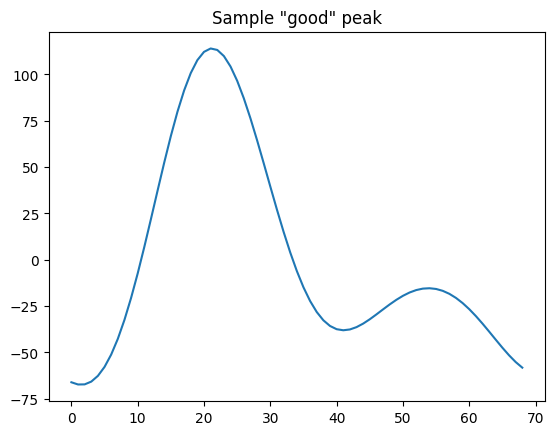

In [41]:
with open("/content/toConvolve.txt","r") as file1: #Reading "good kernel"
  abcd = file1.read().strip('[]').split()
  toConvolve = [float(x) for x in abcd]
plt.plot(toConvolve)
plt.title("Sample \"good\" peak")
plt.show()

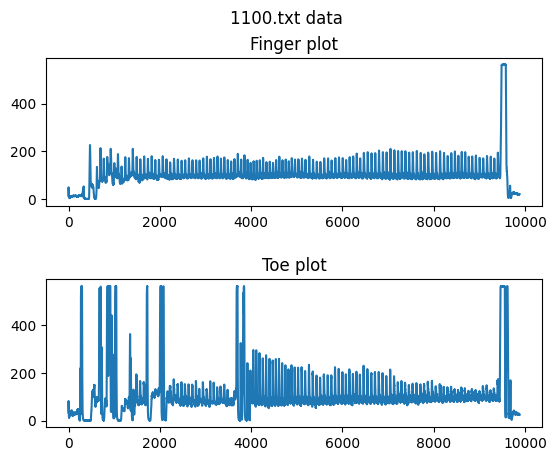

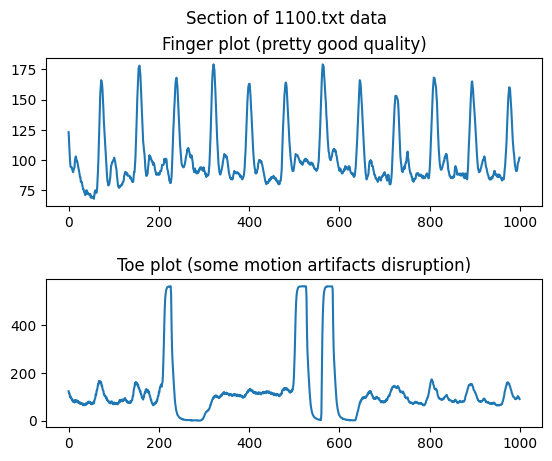

In [42]:
#Reading actual data
data=[]
with open("/content/1100.txt","r") as file1:
  for line in file1:
    values = line.strip().split(',')
    data.append([float(values[0]), int(values[1]), int(values[2])])

timeDifference = data[-1][0] - data[0][0]
numSamples = len(data)
frequency = numSamples/timeDifference #Approximately 100 hertz

#Plotting the entire data
fig, (ax1, ax2) = plt.subplots(2, 1)
y1=[x[1] for x in data]
y2=[x[2] for x in data]
ax1.set_title('Finger plot')
ax1.plot(y1)
ax2.set_title('Toe plot')
ax2.plot(y2)
plt.subplots_adjust(hspace=0.5)

fig.suptitle('1100.txt data')
plt.show()

#Plotting the some parts of the data
fig, (ax1, ax2) = plt.subplots(2, 1)
ax1.set_title('Finger plot (pretty good quality)')

ax1.plot(y1[1500:2500])
ax2.set_title('Toe plot (some motion artifacts disruption)')
ax2.plot(y2[1500:2500])
plt.subplots_adjust(hspace=0.5)

fig.suptitle('Section of 1100.txt data')
plt.show()

multiple of 500


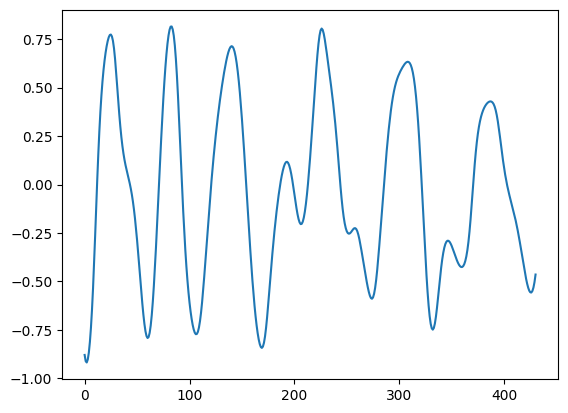

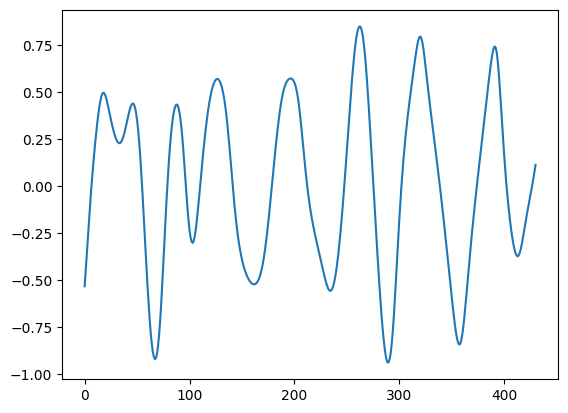

____
None
____
multiple of 500


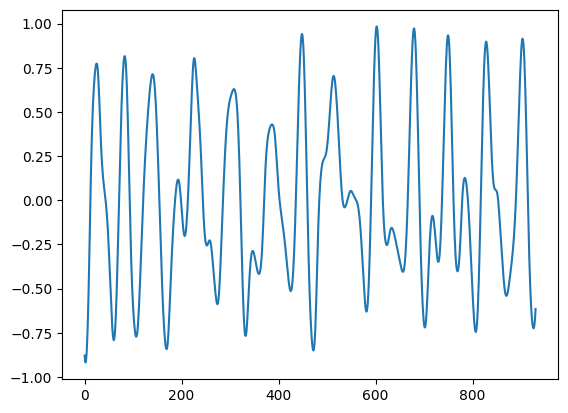

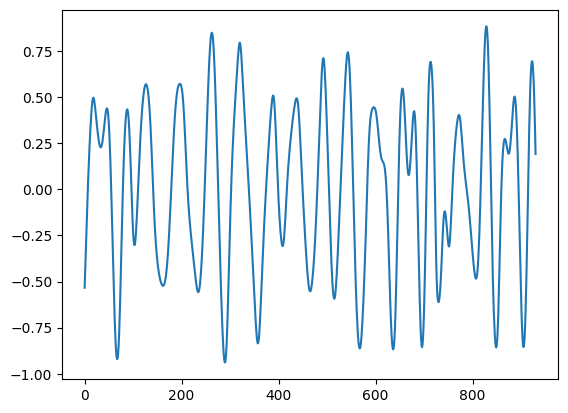

____
None
____
multiple of 500


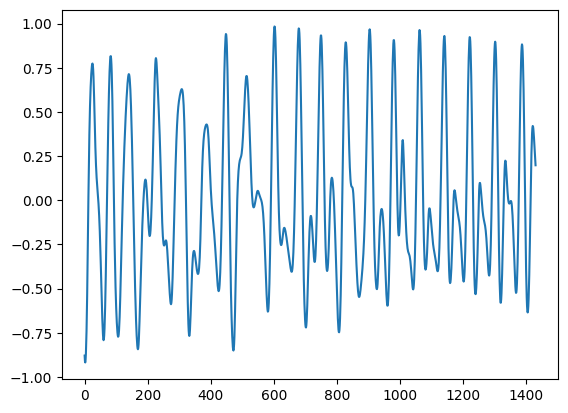

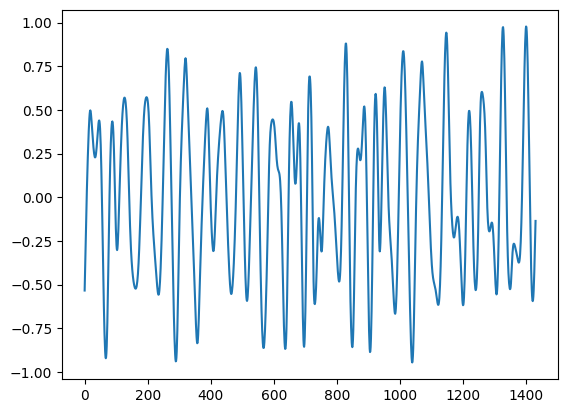

____
None
____
multiple of 500


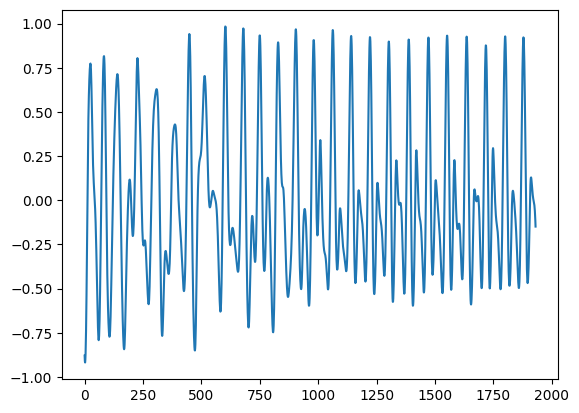

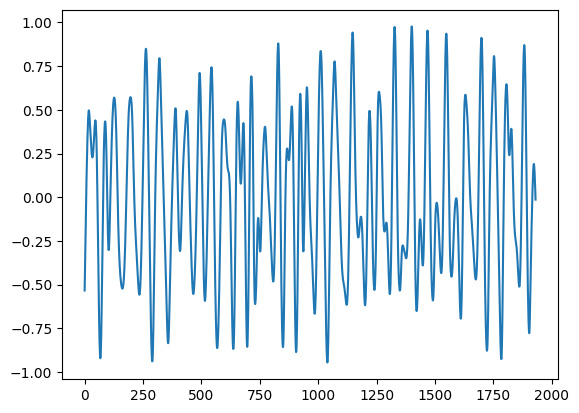

[448, 602, 679, 750, 904, 981, 1062, 1141, 1221, 1387]
[602, 679, 750, 904, 981, 1062, 1141, 1221, 1387, 1471]
[679, 750, 904, 981, 1062, 1141, 1221, 1387, 1471, 1552]
[750, 904, 981, 1062, 1141, 1221, 1387, 1471, 1552, 1635]
[904, 981, 1062, 1141, 1221, 1387, 1471, 1552, 1635, 1800]
____
None
____
multiple of 500


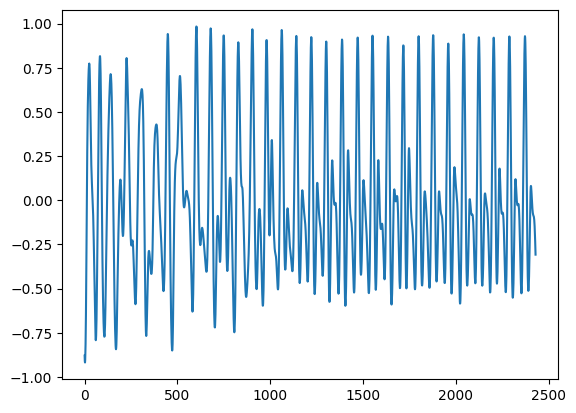

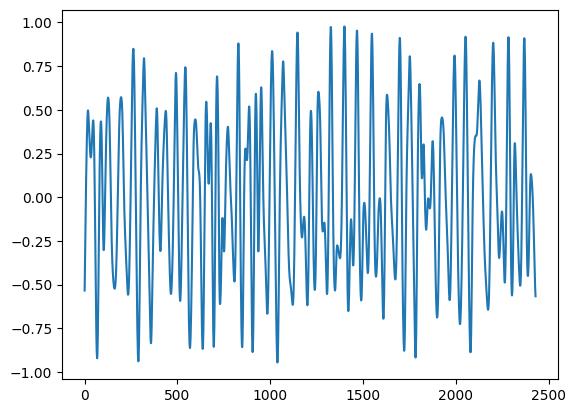

[448, 602, 679, 750, 904, 981, 1062, 1141, 1221, 1387]
[602, 679, 750, 904, 981, 1062, 1141, 1221, 1387, 1471]
[679, 750, 904, 981, 1062, 1141, 1221, 1387, 1471, 1552]
[750, 904, 981, 1062, 1141, 1221, 1387, 1471, 1552, 1635]
[904, 981, 1062, 1141, 1221, 1387, 1471, 1552, 1635, 1800]
[981, 1062, 1141, 1221, 1387, 1471, 1552, 1635, 1800, 1878]
[1062, 1141, 1221, 1387, 1471, 1552, 1635, 1800, 1878, 2043]
[1141, 1221, 1387, 1471, 1552, 1635, 1800, 1878, 2043, 2125]
[1221, 1387, 1471, 1552, 1635, 1800, 1878, 2043, 2125, 2205]
[1387, 1471, 1552, 1635, 1800, 1878, 2043, 2125, 2205, 2289]
____
None
____
multiple of 500


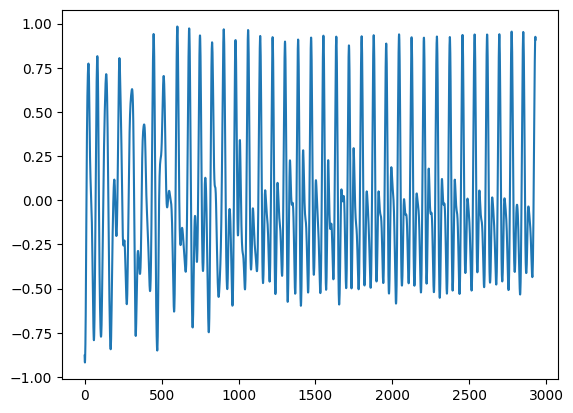

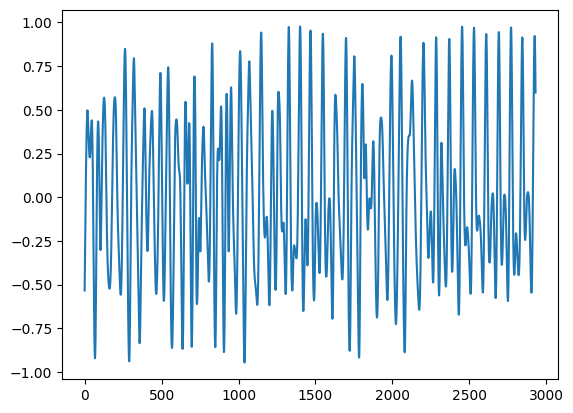

[448, 602, 679, 750, 904, 981, 1062, 1141, 1221, 1387]
[602, 679, 750, 904, 981, 1062, 1141, 1221, 1387, 1471]
[679, 750, 904, 981, 1062, 1141, 1221, 1387, 1471, 1552]
[750, 904, 981, 1062, 1141, 1221, 1387, 1471, 1552, 1635]
[904, 981, 1062, 1141, 1221, 1387, 1471, 1552, 1635, 1800]
[981, 1062, 1141, 1221, 1387, 1471, 1552, 1635, 1800, 1878]
[1062, 1141, 1221, 1387, 1471, 1552, 1635, 1800, 1878, 2043]
[1141, 1221, 1387, 1471, 1552, 1635, 1800, 1878, 2043, 2125]
[1221, 1387, 1471, 1552, 1635, 1800, 1878, 2043, 2125, 2205]
[1387, 1471, 1552, 1635, 1800, 1878, 2043, 2125, 2205, 2289]
[1471, 1552, 1635, 1800, 1878, 2043, 2125, 2205, 2289, 2373]
[1552, 1635, 1800, 1878, 2043, 2125, 2205, 2289, 2373, 2456]
[1635, 1800, 1878, 2043, 2125, 2205, 2289, 2373, 2456, 2534]
[1800, 1878, 2043, 2125, 2205, 2289, 2373, 2456, 2534, 2615]
[1878, 2043, 2125, 2205, 2289, 2373, 2456, 2534, 2615, 2695]
[2043, 2125, 2205, 2289, 2373, 2456, 2534, 2615, 2695, 2775]
[2125, 2205, 2289, 2373, 2456, 2534, 2615, 26

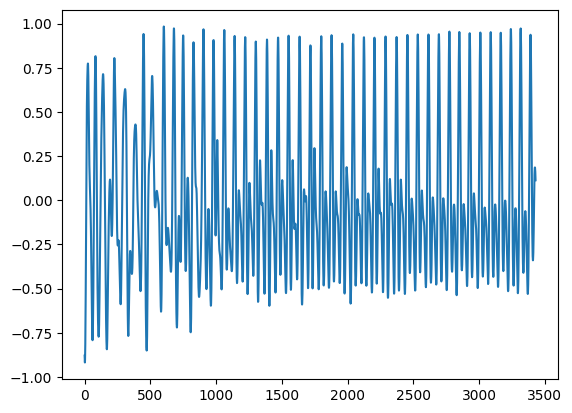

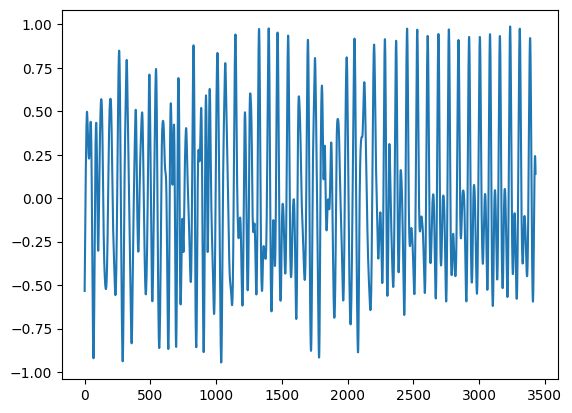

[448, 602, 679, 750, 904, 981, 1062, 1141, 1221, 1387]
[602, 679, 750, 904, 981, 1062, 1141, 1221, 1387, 1471]
[679, 750, 904, 981, 1062, 1141, 1221, 1387, 1471, 1552]
[750, 904, 981, 1062, 1141, 1221, 1387, 1471, 1552, 1635]
[904, 981, 1062, 1141, 1221, 1387, 1471, 1552, 1635, 1800]
[981, 1062, 1141, 1221, 1387, 1471, 1552, 1635, 1800, 1878]
[1062, 1141, 1221, 1387, 1471, 1552, 1635, 1800, 1878, 2043]
[1141, 1221, 1387, 1471, 1552, 1635, 1800, 1878, 2043, 2125]
[1221, 1387, 1471, 1552, 1635, 1800, 1878, 2043, 2125, 2205]
[1387, 1471, 1552, 1635, 1800, 1878, 2043, 2125, 2205, 2289]
[1471, 1552, 1635, 1800, 1878, 2043, 2125, 2205, 2289, 2373]
[1552, 1635, 1800, 1878, 2043, 2125, 2205, 2289, 2373, 2456]
[1635, 1800, 1878, 2043, 2125, 2205, 2289, 2373, 2456, 2534]
[1800, 1878, 2043, 2125, 2205, 2289, 2373, 2456, 2534, 2615]
[1878, 2043, 2125, 2205, 2289, 2373, 2456, 2534, 2615, 2695]
[2043, 2125, 2205, 2289, 2373, 2456, 2534, 2615, 2695, 2775]
[2125, 2205, 2289, 2373, 2456, 2534, 2615, 26

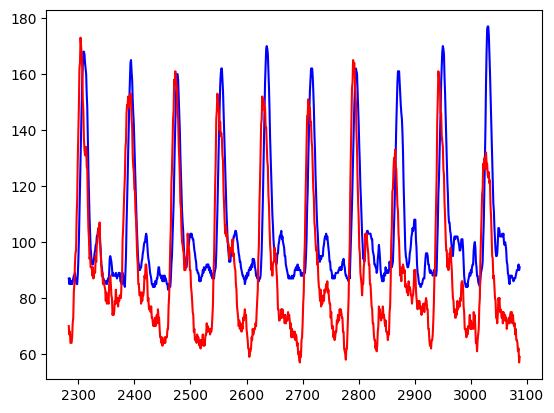

Found a match!
Checking for another graph after identifying one!


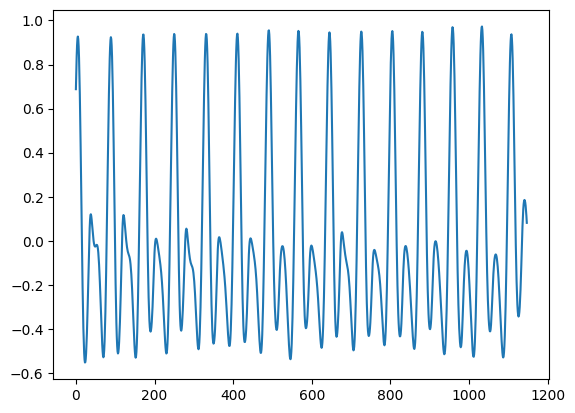

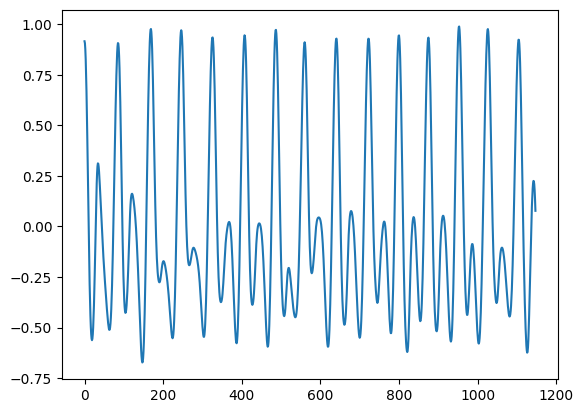

[5, 89, 172, 250, 331, 411, 491, 566, 645, 726]
[89, 172, 250, 331, 411, 491, 566, 645, 726, 805]
[172, 250, 331, 411, 491, 566, 645, 726, 805, 881]
[250, 331, 411, 491, 566, 645, 726, 805, 881, 958]
[331, 411, 491, 566, 645, 726, 805, 881, 958, 1033]
[85, 169, 246, 326, 407, 487, 560, 641, 722, 800]
[169, 246, 326, 407, 487, 560, 641, 722, 800, 875]
[246, 326, 407, 487, 560, 641, 722, 800, 875, 953]
[326, 407, 487, 560, 641, 722, 800, 875, 953, 1026]
[2368, 3164]
____
[2368, 3164]
____


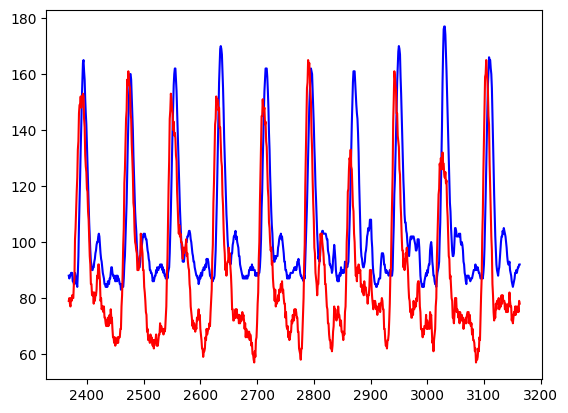

Found a match!
Checking for another graph after identifying one!


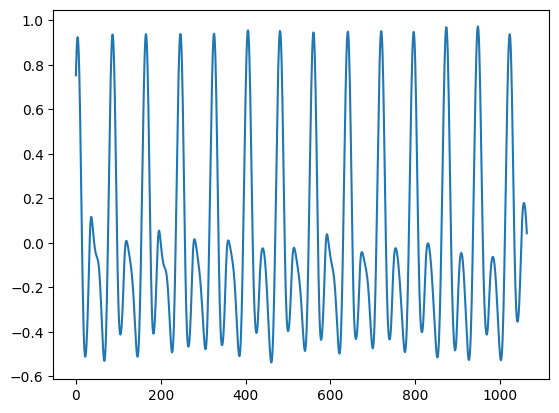

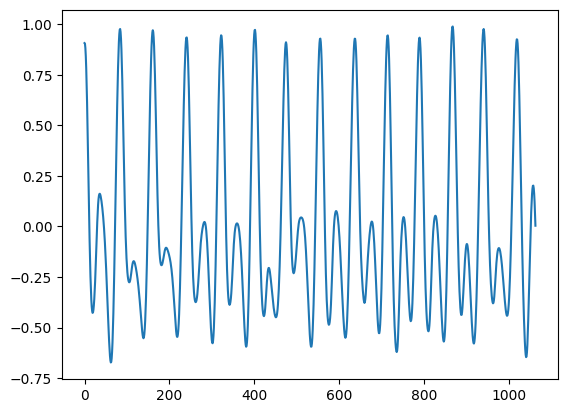

[4, 87, 165, 246, 326, 406, 481, 560, 641, 720]
[87, 165, 246, 326, 406, 481, 560, 641, 720, 796]
[165, 246, 326, 406, 481, 560, 641, 720, 796, 873]
[246, 326, 406, 481, 560, 641, 720, 796, 873, 948]
[84, 161, 241, 322, 402, 475, 556, 637, 715, 790]
[161, 241, 322, 402, 475, 556, 637, 715, 790, 868]
[241, 322, 402, 475, 556, 637, 715, 790, 868, 941]
[2452, 3241]
____
[2452, 3241]
____


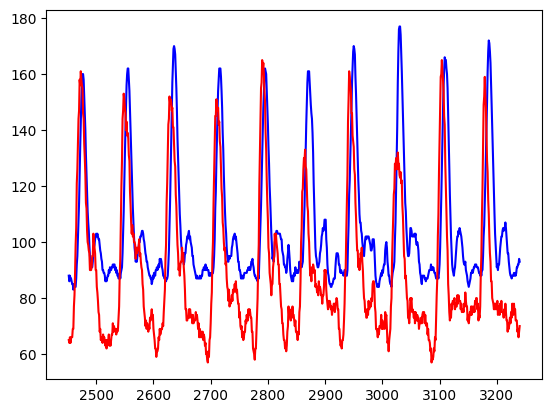

Found a match!
Checking for another graph after identifying one!


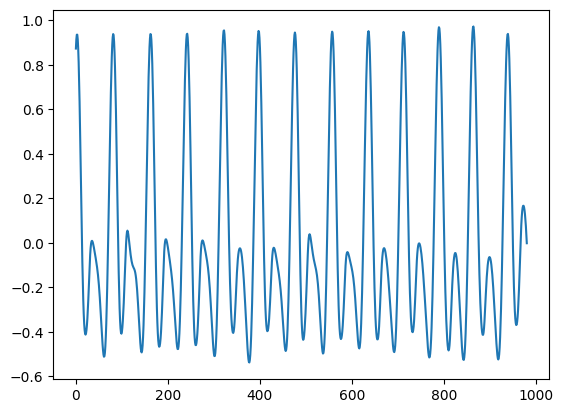

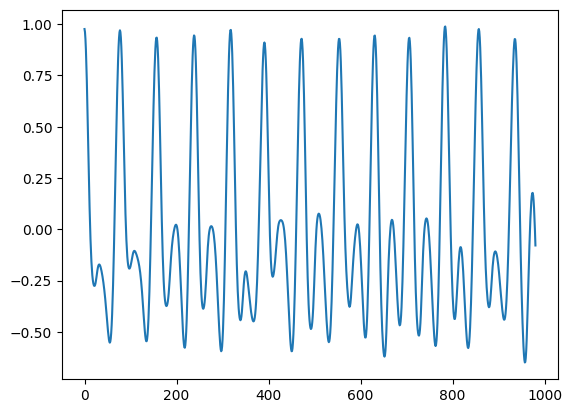

[3, 81, 162, 242, 322, 397, 476, 557, 636, 712]
[81, 162, 242, 322, 397, 476, 557, 636, 712, 789]
[162, 242, 322, 397, 476, 557, 636, 712, 789, 864]
[77, 157, 238, 318, 391, 472, 553, 631, 706, 784]
[157, 238, 318, 391, 472, 553, 631, 706, 784, 857]
[2529, 3316]
____
[2529, 3316]
____


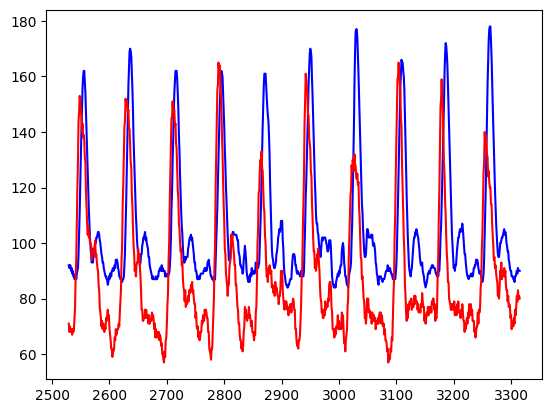

Found a match!
Checking for another graph after identifying one!


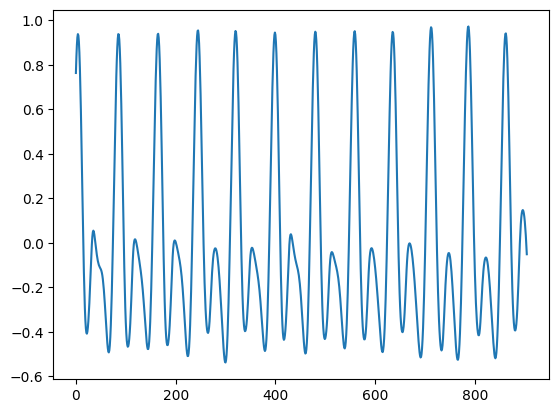

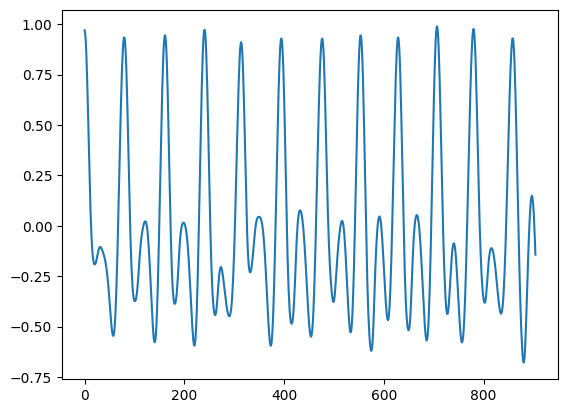

[4, 85, 165, 245, 320, 399, 480, 559, 635, 712]
[85, 165, 245, 320, 399, 480, 559, 635, 712, 787]
[80, 161, 241, 314, 395, 476, 554, 629, 707, 780]
[2609, 3391]
____
[2609, 3391]
____


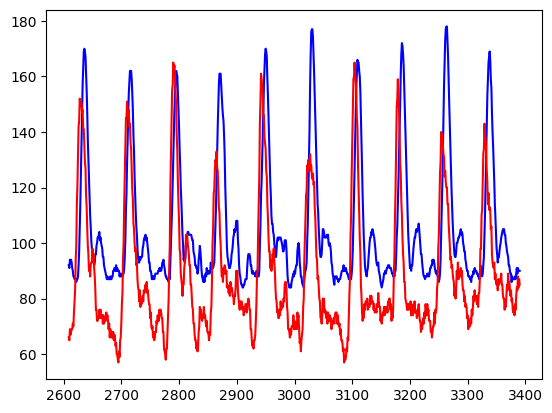

Found a match!
Checking for another graph after identifying one!


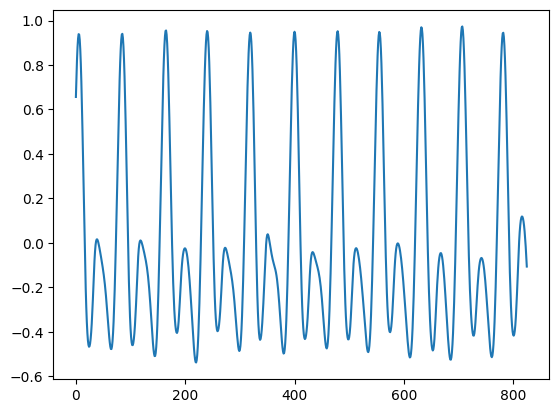

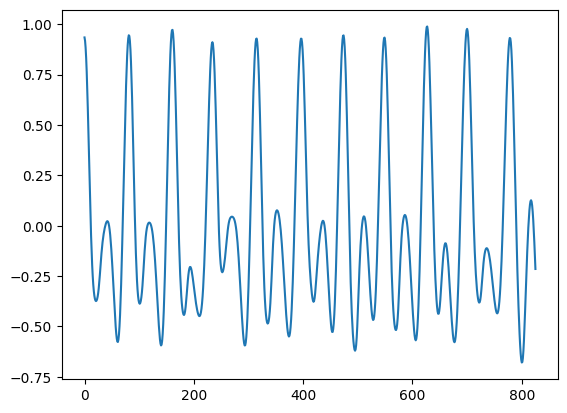

[5, 85, 165, 240, 319, 400, 479, 555, 632, 707]
____
None
____
multiple of 500


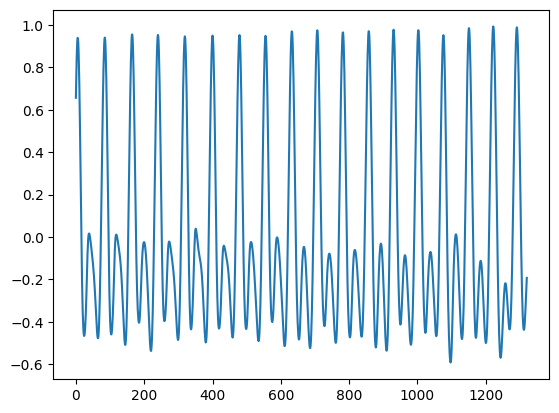

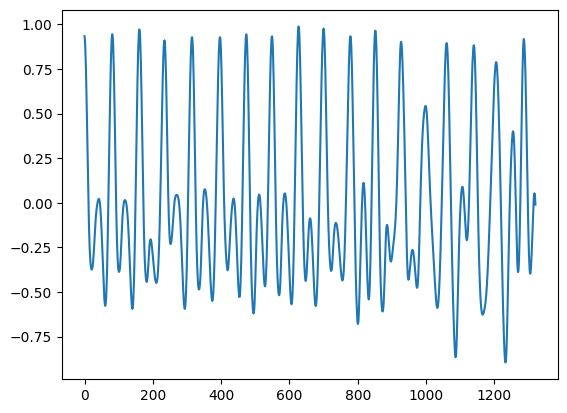

[5, 85, 165, 240, 319, 400, 479, 555, 632, 707]
[85, 165, 240, 319, 400, 479, 555, 632, 707, 782]
[165, 240, 319, 400, 479, 555, 632, 707, 782, 857]
[240, 319, 400, 479, 555, 632, 707, 782, 857, 930]
[319, 400, 479, 555, 632, 707, 782, 857, 930, 1003]
[400, 479, 555, 632, 707, 782, 857, 930, 1003, 1076]
[479, 555, 632, 707, 782, 857, 930, 1003, 1076, 1151]
[555, 632, 707, 782, 857, 930, 1003, 1076, 1151, 1222]
[81, 161, 234, 315, 396, 474, 549, 627, 700, 778]
[161, 234, 315, 396, 474, 549, 627, 700, 778, 851]
[234, 315, 396, 474, 549, 627, 700, 778, 851, 927]
[2690, 3466]
____
[2690, 3466]
____


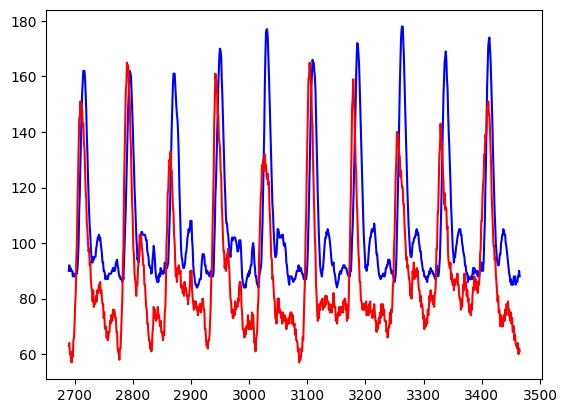

Found a match!
Checking for another graph after identifying one!


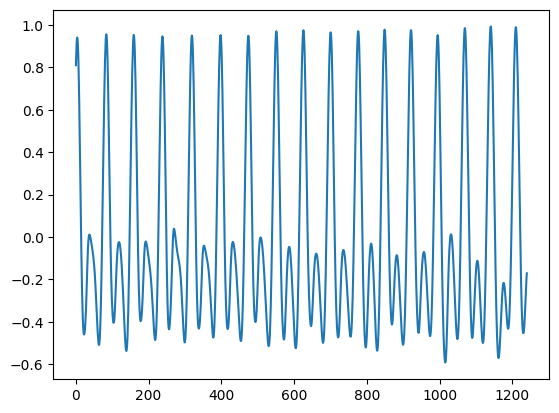

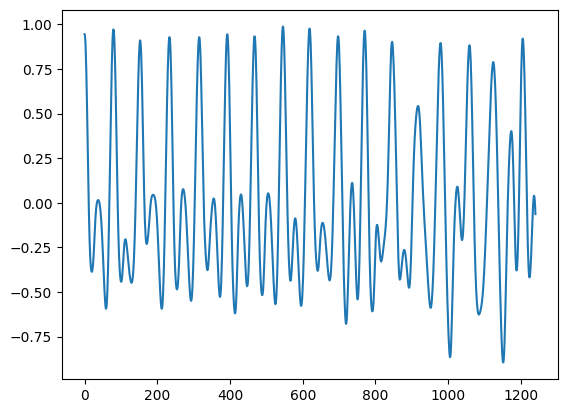

[4, 84, 159, 238, 319, 398, 474, 551, 626, 701]
[84, 159, 238, 319, 398, 474, 551, 626, 701, 776]
[159, 238, 319, 398, 474, 551, 626, 701, 776, 849]
[238, 319, 398, 474, 551, 626, 701, 776, 849, 922]
[319, 398, 474, 551, 626, 701, 776, 849, 922, 995]
[398, 474, 551, 626, 701, 776, 849, 922, 995, 1070]
[474, 551, 626, 701, 776, 849, 922, 995, 1070, 1141]
[80, 153, 234, 315, 393, 468, 546, 619, 697, 770]
[153, 234, 315, 393, 468, 546, 619, 697, 770, 846]
[2770, 3539]
____
[2770, 3539]
____


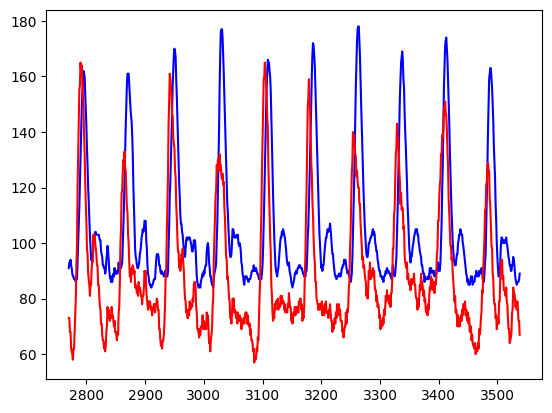

Found a match!
Checking for another graph after identifying one!


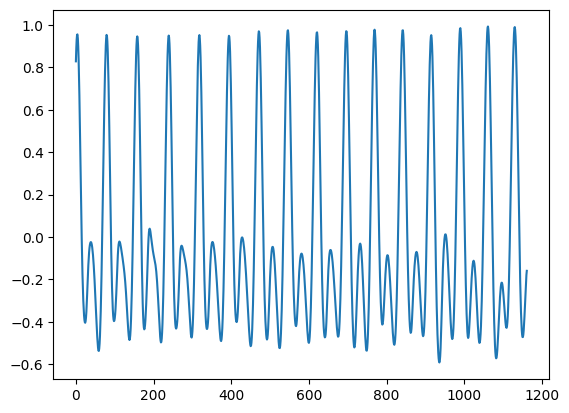

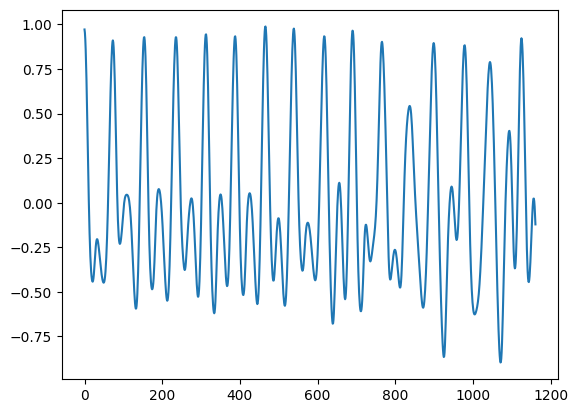

[4, 79, 158, 239, 318, 394, 471, 546, 621, 696]
[79, 158, 239, 318, 394, 471, 546, 621, 696, 769]
[158, 239, 318, 394, 471, 546, 621, 696, 769, 842]
[239, 318, 394, 471, 546, 621, 696, 769, 842, 915]
[318, 394, 471, 546, 621, 696, 769, 842, 915, 990]
[394, 471, 546, 621, 696, 769, 842, 915, 990, 1061]
[73, 154, 235, 313, 388, 466, 539, 617, 690, 766]
[2843, 3895]
____
[2843, 3895]
____


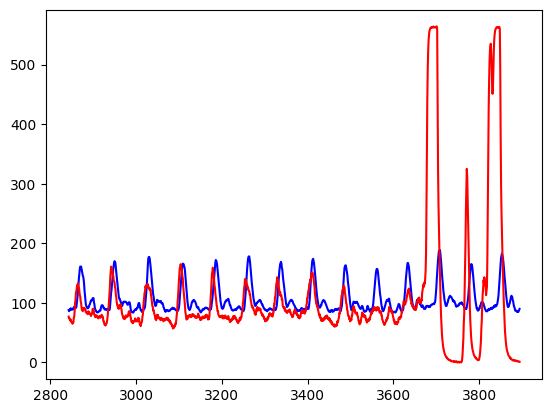

Found a match!
Checking for another graph after identifying one!


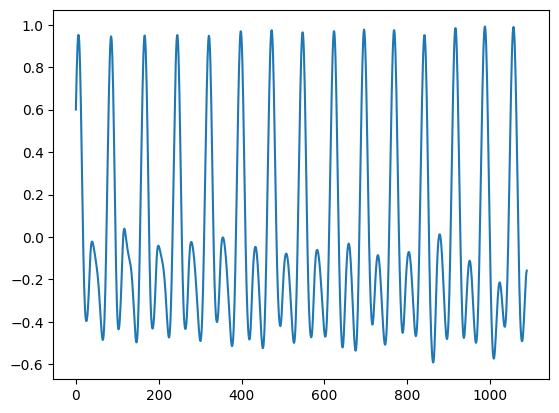

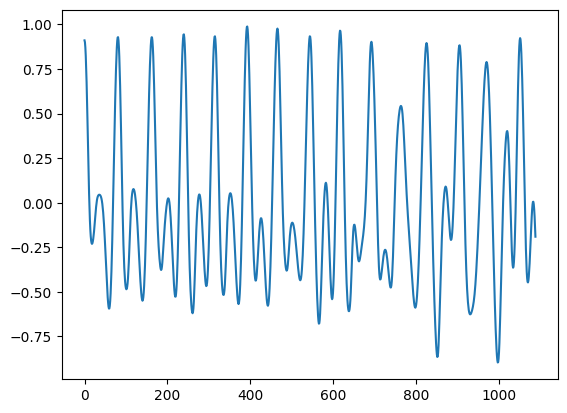

[6, 85, 166, 245, 321, 398, 473, 548, 623, 696]
[85, 166, 245, 321, 398, 473, 548, 623, 696, 769]
[166, 245, 321, 398, 473, 548, 623, 696, 769, 842]
[245, 321, 398, 473, 548, 623, 696, 769, 842, 917]
[321, 398, 473, 548, 623, 696, 769, 842, 917, 988]
____
None
____
multiple of 500


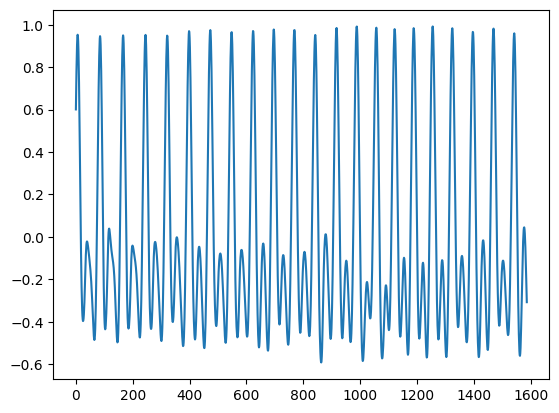

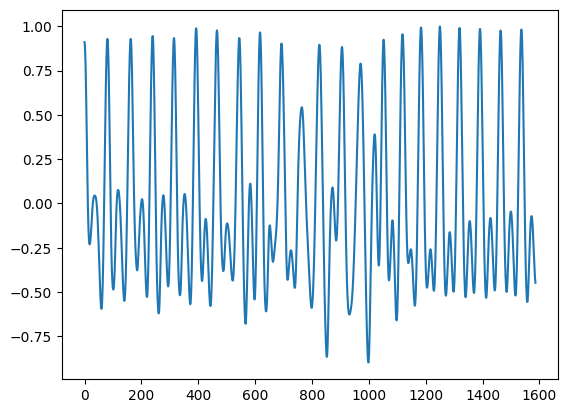

[6, 85, 166, 245, 321, 398, 473, 548, 623, 696]
[85, 166, 245, 321, 398, 473, 548, 623, 696, 769]
[166, 245, 321, 398, 473, 548, 623, 696, 769, 842]
[245, 321, 398, 473, 548, 623, 696, 769, 842, 917]
[321, 398, 473, 548, 623, 696, 769, 842, 917, 988]
[398, 473, 548, 623, 696, 769, 842, 917, 988, 1057]
[473, 548, 623, 696, 769, 842, 917, 988, 1057, 1121]
[548, 623, 696, 769, 842, 917, 988, 1057, 1121, 1188]
[623, 696, 769, 842, 917, 988, 1057, 1121, 1188, 1255]
[696, 769, 842, 917, 988, 1057, 1121, 1188, 1255, 1324]
[769, 842, 917, 988, 1057, 1121, 1188, 1255, 1324, 1396]
[842, 917, 988, 1057, 1121, 1188, 1255, 1324, 1396, 1469]
[81, 162, 240, 315, 393, 466, 544, 617, 693, 1052]
[162, 240, 315, 393, 466, 544, 617, 693, 1052, 1118]
[240, 315, 393, 466, 544, 617, 693, 1052, 1118, 1184]
[315, 393, 466, 544, 617, 693, 1052, 1118, 1184, 1250]
[393, 466, 544, 617, 693, 1052, 1118, 1184, 1250, 1319]
[466, 544, 617, 693, 1052, 1118, 1184, 1250, 1319, 1391]
[544, 617, 693, 1052, 1118, 1184, 1250

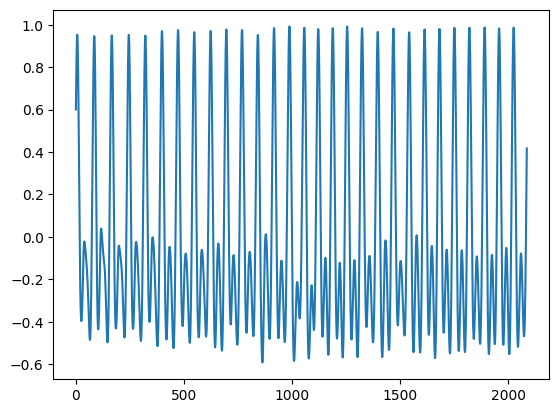

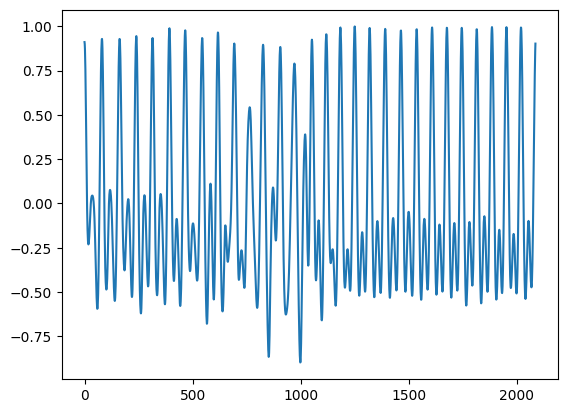

[6, 85, 166, 245, 321, 398, 473, 548, 623, 696]
[85, 166, 245, 321, 398, 473, 548, 623, 696, 769]
[166, 245, 321, 398, 473, 548, 623, 696, 769, 842]
[245, 321, 398, 473, 548, 623, 696, 769, 842, 917]
[321, 398, 473, 548, 623, 696, 769, 842, 917, 988]
[398, 473, 548, 623, 696, 769, 842, 917, 988, 1057]
[473, 548, 623, 696, 769, 842, 917, 988, 1057, 1121]
[548, 623, 696, 769, 842, 917, 988, 1057, 1121, 1188]
[623, 696, 769, 842, 917, 988, 1057, 1121, 1188, 1255]
[696, 769, 842, 917, 988, 1057, 1121, 1188, 1255, 1324]
[769, 842, 917, 988, 1057, 1121, 1188, 1255, 1324, 1396]
[842, 917, 988, 1057, 1121, 1188, 1255, 1324, 1396, 1469]
[917, 988, 1057, 1121, 1188, 1255, 1324, 1396, 1469, 1542]
[988, 1057, 1121, 1188, 1255, 1324, 1396, 1469, 1542, 1613]
[1057, 1121, 1188, 1255, 1324, 1396, 1469, 1542, 1613, 1682]
[1121, 1188, 1255, 1324, 1396, 1469, 1542, 1613, 1682, 1751]
[1188, 1255, 1324, 1396, 1469, 1542, 1613, 1682, 1751, 1820]
[1255, 1324, 1396, 1469, 1542, 1613, 1682, 1751, 1820, 1891]
[

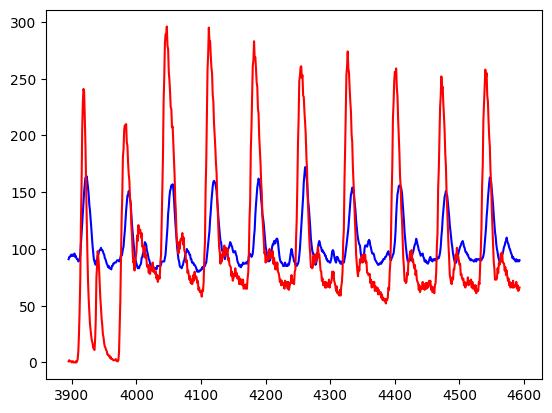

Found a match!
Checking for another graph after identifying one!


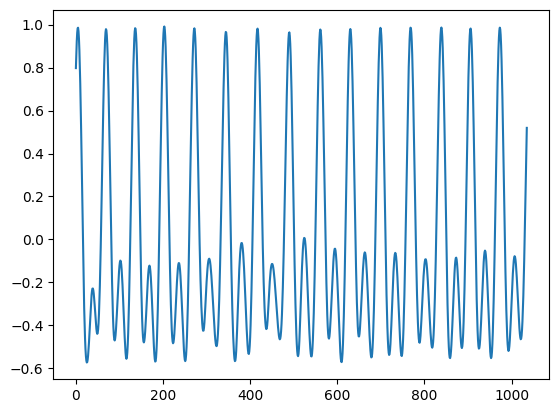

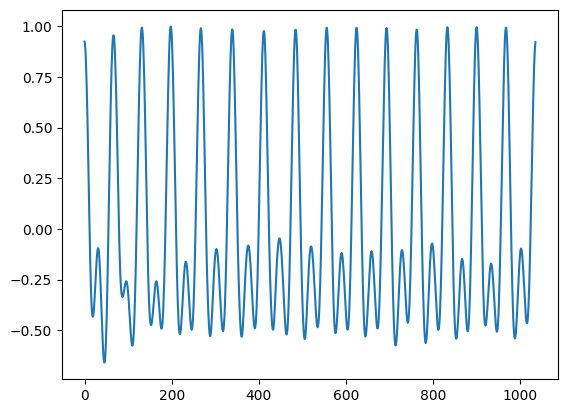

[5, 69, 136, 203, 272, 344, 417, 490, 561, 630]
[69, 136, 203, 272, 344, 417, 490, 561, 630, 699]
[136, 203, 272, 344, 417, 490, 561, 630, 699, 768]
[203, 272, 344, 417, 490, 561, 630, 699, 768, 839]
[272, 344, 417, 490, 561, 630, 699, 768, 839, 906]
[66, 132, 198, 267, 339, 412, 485, 556, 624, 693]
[132, 198, 267, 339, 412, 485, 556, 624, 693, 763]
[198, 267, 339, 412, 485, 556, 624, 693, 763, 833]
[267, 339, 412, 485, 556, 624, 693, 763, 833, 900]
[3961, 4663]
____
[3961, 4663]
____


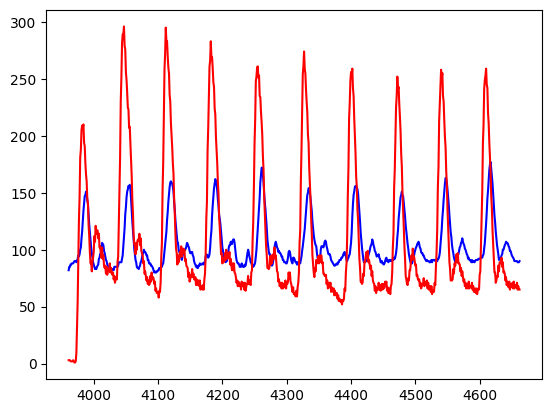

Found a match!
Checking for another graph after identifying one!


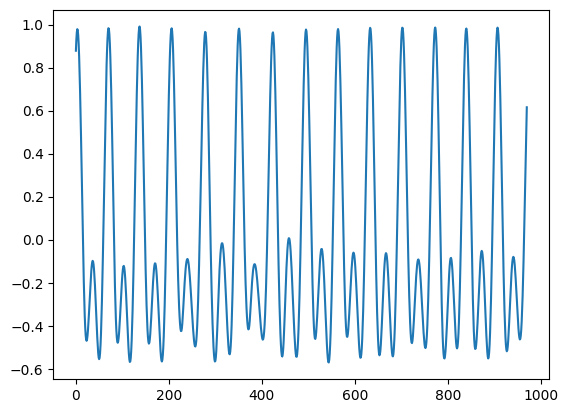

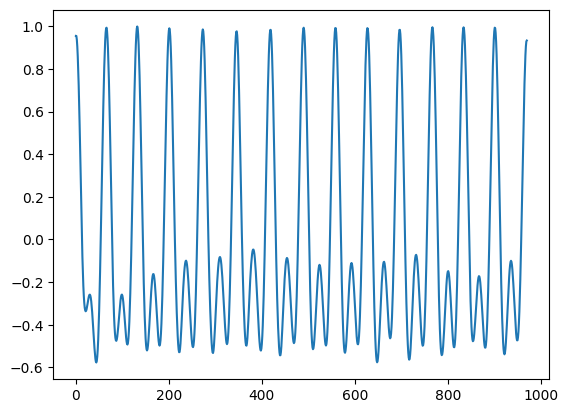

[3, 70, 137, 206, 278, 351, 424, 495, 564, 633]
[70, 137, 206, 278, 351, 424, 495, 564, 633, 702]
[137, 206, 278, 351, 424, 495, 564, 633, 702, 773]
[206, 278, 351, 424, 495, 564, 633, 702, 773, 840]
[66, 132, 201, 273, 346, 419, 490, 558, 627, 697]
[132, 201, 273, 346, 419, 490, 558, 627, 697, 767]
[201, 273, 346, 419, 490, 558, 627, 697, 767, 834]
[4027, 4734]
____
[4027, 4734]
____


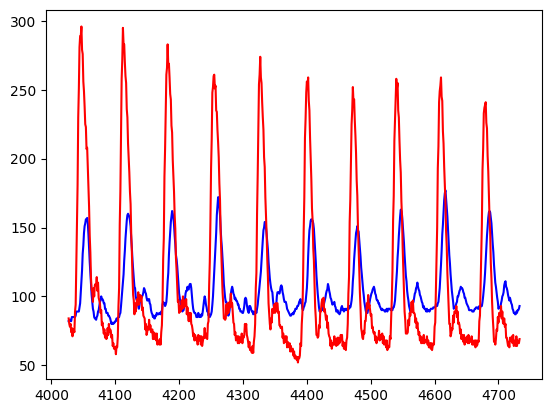

Found a match!
Checking for another graph after identifying one!


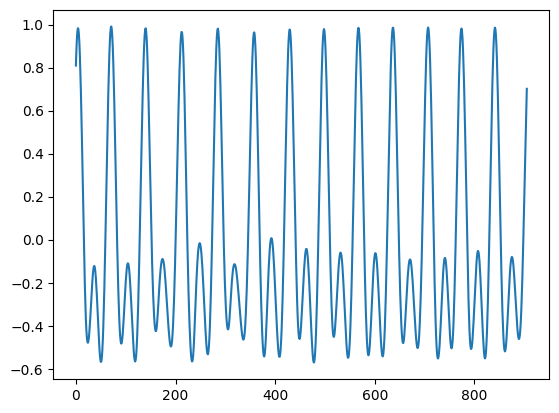

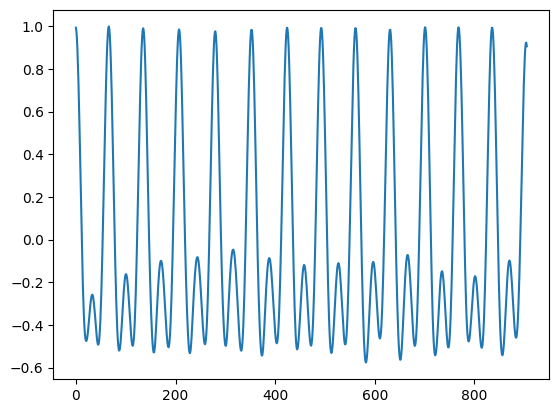

[4, 71, 140, 212, 285, 358, 429, 498, 567, 636]
[71, 140, 212, 285, 358, 429, 498, 567, 636, 707]
[140, 212, 285, 358, 429, 498, 567, 636, 707, 774]
[66, 135, 207, 280, 353, 424, 492, 561, 631, 701]
[135, 207, 280, 353, 424, 492, 561, 631, 701, 768]
[207, 280, 353, 424, 492, 561, 631, 701, 768, 835]
[4093, 4801]
____
[4093, 4801]
____


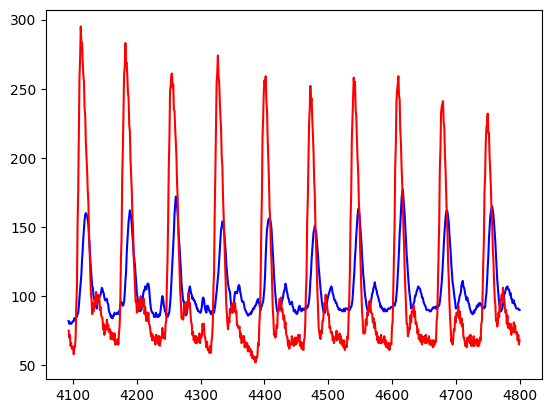

Found a match!
Checking for another graph after identifying one!


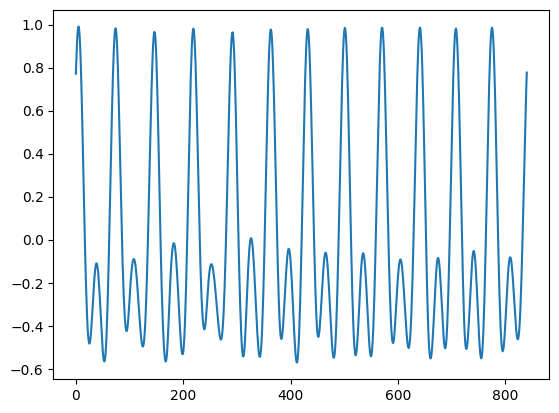

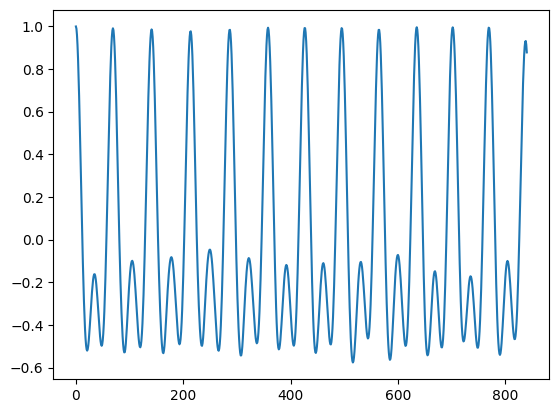

[5, 74, 146, 219, 292, 363, 432, 501, 570, 641]
[74, 146, 219, 292, 363, 432, 501, 570, 641, 708]
[69, 141, 214, 287, 358, 426, 495, 565, 635, 702]
[141, 214, 287, 358, 426, 495, 565, 635, 702, 769]
[4162, 4868]
____
[4162, 4868]
____


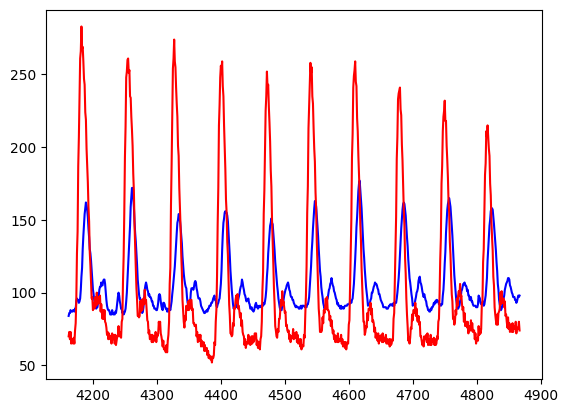

Found a match!
Checking for another graph after identifying one!


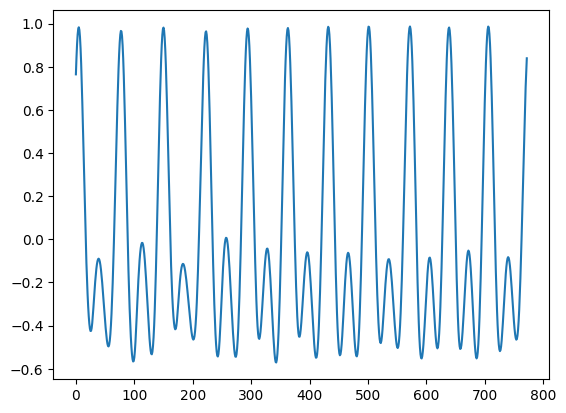

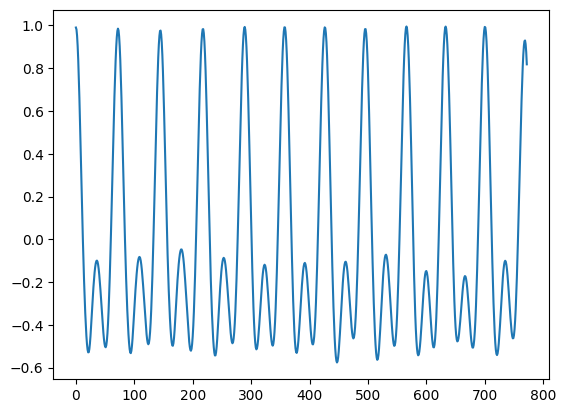

[5, 77, 150, 223, 294, 363, 432, 501, 572, 639]
[72, 145, 218, 289, 357, 426, 496, 566, 633, 700]
____
None
____
multiple of 500


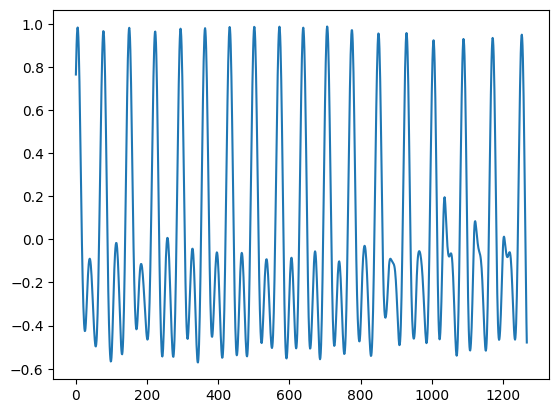

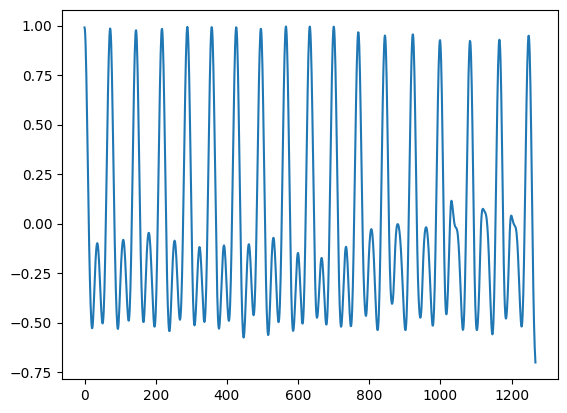

[5, 77, 150, 223, 294, 363, 432, 501, 572, 639]
[77, 150, 223, 294, 363, 432, 501, 572, 639, 706]
[150, 223, 294, 363, 432, 501, 572, 639, 706, 776]
[223, 294, 363, 432, 501, 572, 639, 706, 776, 850]
[294, 363, 432, 501, 572, 639, 706, 776, 850, 929]
[363, 432, 501, 572, 639, 706, 776, 850, 929, 1005]
[432, 501, 572, 639, 706, 776, 850, 929, 1005, 1089]
[501, 572, 639, 706, 776, 850, 929, 1005, 1089, 1171]
[72, 145, 218, 289, 357, 426, 496, 566, 633, 700]
[145, 218, 289, 357, 426, 496, 566, 633, 700, 769]
[218, 289, 357, 426, 496, 566, 633, 700, 769, 844]
[289, 357, 426, 496, 566, 633, 700, 769, 844, 922]
[357, 426, 496, 566, 633, 700, 769, 844, 922, 999]
[426, 496, 566, 633, 700, 769, 844, 922, 999, 1083]
[496, 566, 633, 700, 769, 844, 922, 999, 1083, 1166]
[4234, 4938]
____
[4234, 4938]
____


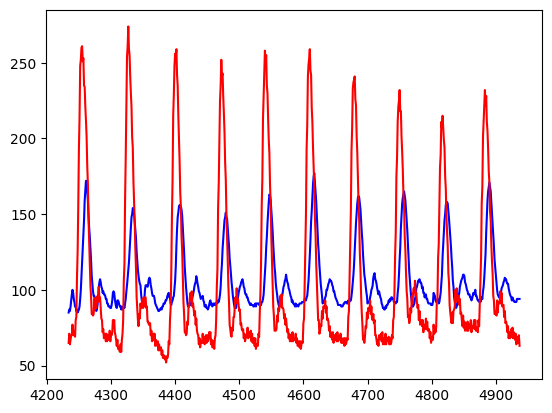

Found a match!
Checking for another graph after identifying one!


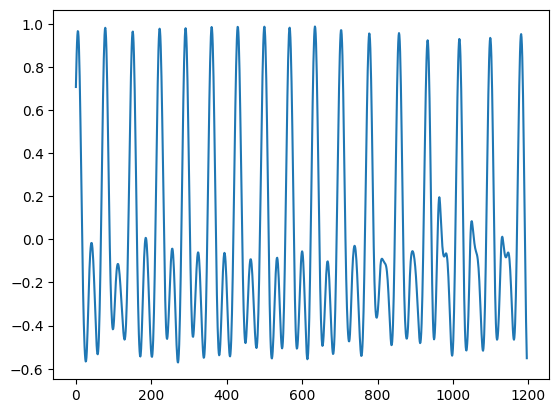

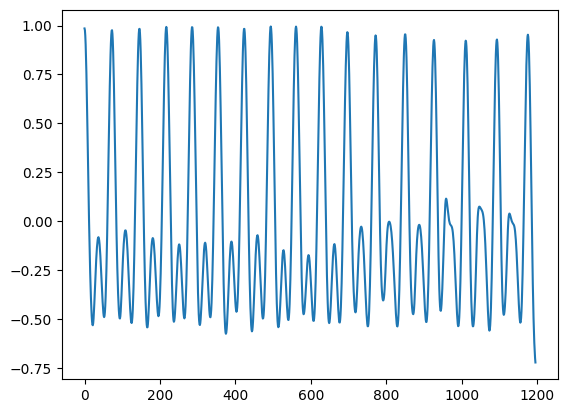

[5, 78, 151, 222, 291, 360, 429, 500, 567, 634]
[78, 151, 222, 291, 360, 429, 500, 567, 634, 704]
[151, 222, 291, 360, 429, 500, 567, 634, 704, 778]
[222, 291, 360, 429, 500, 567, 634, 704, 778, 857]
[291, 360, 429, 500, 567, 634, 704, 778, 857, 933]
[360, 429, 500, 567, 634, 704, 778, 857, 933, 1017]
[429, 500, 567, 634, 704, 778, 857, 933, 1017, 1099]
[73, 146, 217, 285, 354, 424, 494, 561, 628, 697]
[146, 217, 285, 354, 424, 494, 561, 628, 697, 772]
[217, 285, 354, 424, 494, 561, 628, 697, 772, 850]
[285, 354, 424, 494, 561, 628, 697, 772, 850, 927]
[354, 424, 494, 561, 628, 697, 772, 850, 927, 1011]
[424, 494, 561, 628, 697, 772, 850, 927, 1011, 1094]
[4307, 5012]
____
[4307, 5012]
____


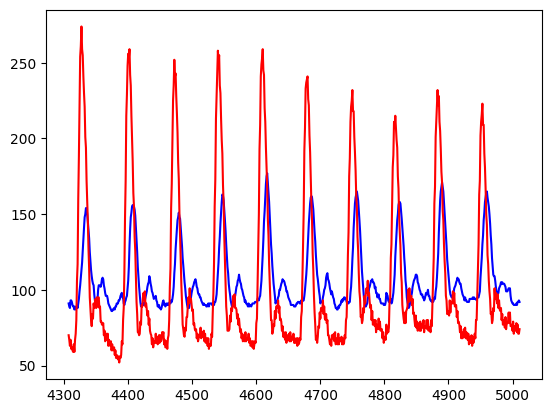

Found a match!
Checking for another graph after identifying one!


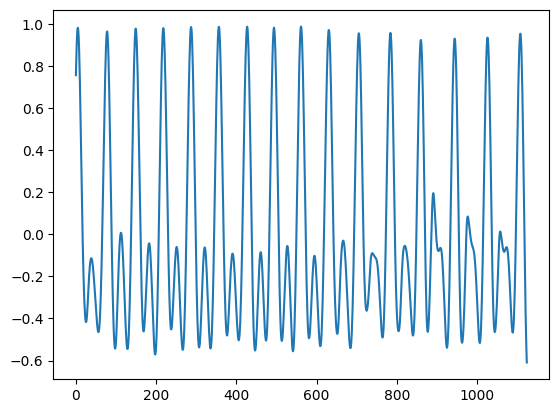

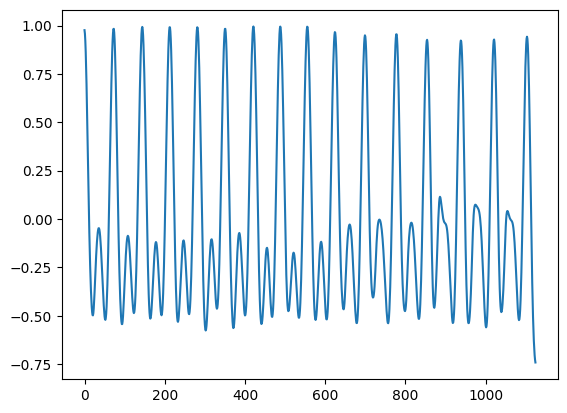

[5, 78, 149, 218, 287, 356, 427, 494, 561, 631]
[78, 149, 218, 287, 356, 427, 494, 561, 631, 705]
[149, 218, 287, 356, 427, 494, 561, 631, 705, 784]
[218, 287, 356, 427, 494, 561, 631, 705, 784, 860]
[287, 356, 427, 494, 561, 631, 705, 784, 860, 944]
[356, 427, 494, 561, 631, 705, 784, 860, 944, 1026]
[73, 144, 212, 281, 351, 421, 488, 555, 624, 699]
[144, 212, 281, 351, 421, 488, 555, 624, 699, 777]
[212, 281, 351, 421, 488, 555, 624, 699, 777, 854]
[281, 351, 421, 488, 555, 624, 699, 777, 854, 938]
[351, 421, 488, 555, 624, 699, 777, 854, 938, 1021]
[4380, 5091]
____
[4380, 5091]
____


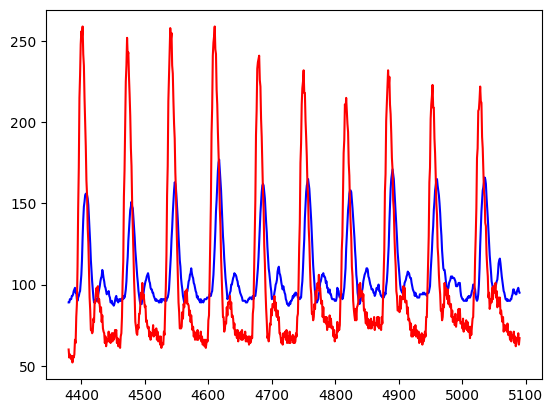

Found a match!
Checking for another graph after identifying one!


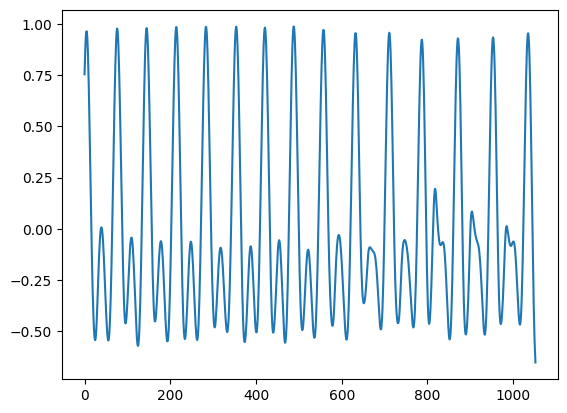

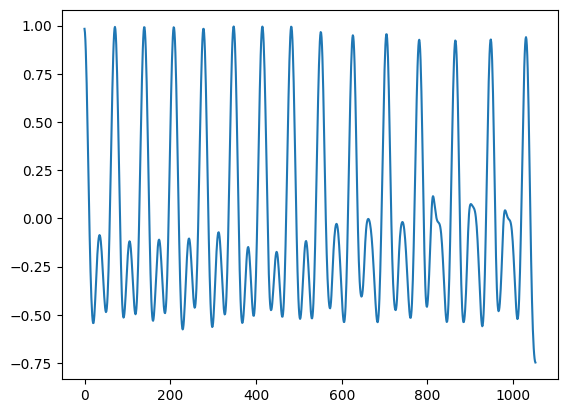

[5, 76, 145, 214, 283, 354, 421, 488, 558, 632]
[76, 145, 214, 283, 354, 421, 488, 558, 632, 711]
[145, 214, 283, 354, 421, 488, 558, 632, 711, 787]
[214, 283, 354, 421, 488, 558, 632, 711, 787, 871]
[283, 354, 421, 488, 558, 632, 711, 787, 871, 953]
[71, 139, 208, 278, 348, 415, 482, 551, 626, 704]
[139, 208, 278, 348, 415, 482, 551, 626, 704, 781]
[208, 278, 348, 415, 482, 551, 626, 704, 781, 865]
[278, 348, 415, 482, 551, 626, 704, 781, 865, 948]
[4451, 5167]
____
[4451, 5167]
____


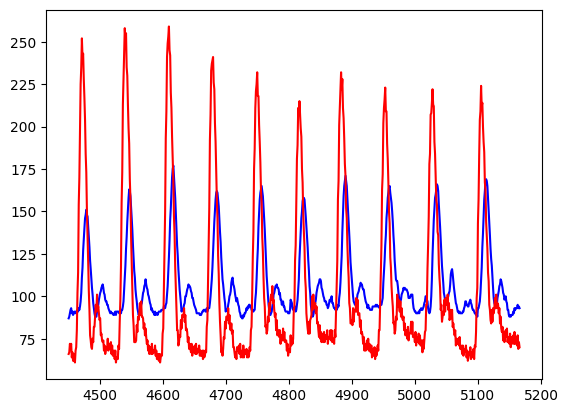

Found a match!
Checking for another graph after identifying one!


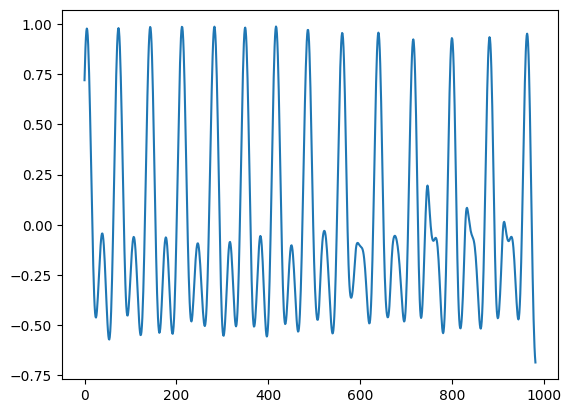

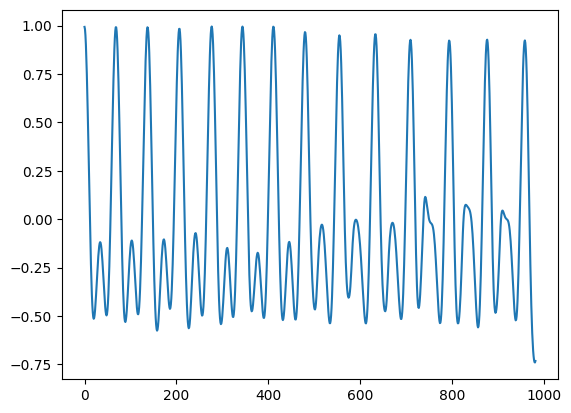

[5, 74, 143, 212, 283, 350, 417, 487, 561, 640]
[74, 143, 212, 283, 350, 417, 487, 561, 640, 716]
[143, 212, 283, 350, 417, 487, 561, 640, 716, 800]
[212, 283, 350, 417, 487, 561, 640, 716, 800, 882]
[68, 137, 207, 277, 344, 411, 480, 555, 633, 710]
[137, 207, 277, 344, 411, 480, 555, 633, 710, 794]
[207, 277, 344, 411, 480, 555, 633, 710, 794, 877]
[4519, 5251]
____
[4519, 5251]
____


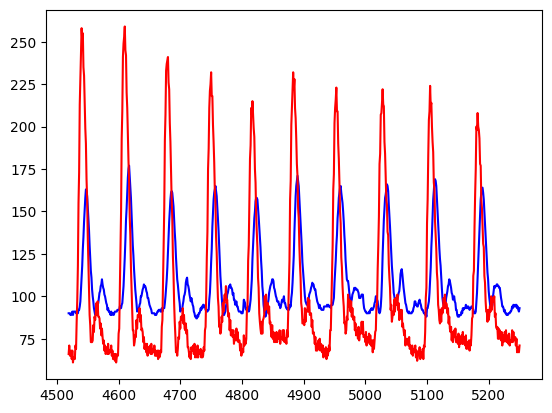

Found a match!
Checking for another graph after identifying one!


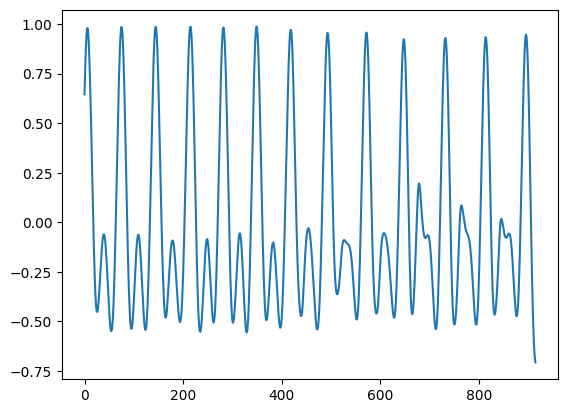

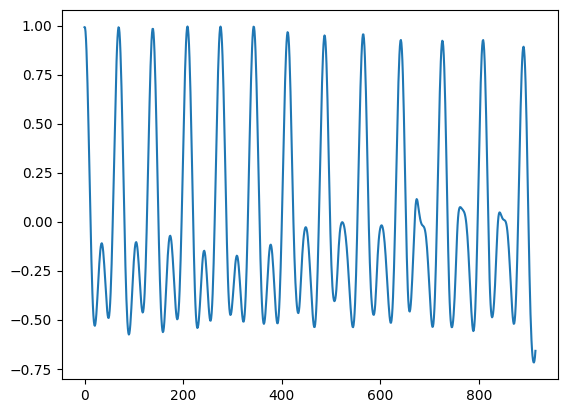

[6, 75, 144, 215, 282, 349, 419, 493, 572, 648]
[75, 144, 215, 282, 349, 419, 493, 572, 648, 732]
[144, 215, 282, 349, 419, 493, 572, 648, 732, 814]
[69, 139, 209, 276, 343, 412, 487, 565, 642, 726]
[4588, 5333]
____
[4588, 5333]
____


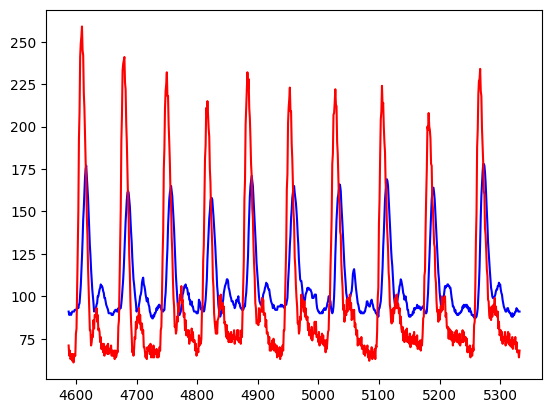

Found a match!
Checking for another graph after identifying one!


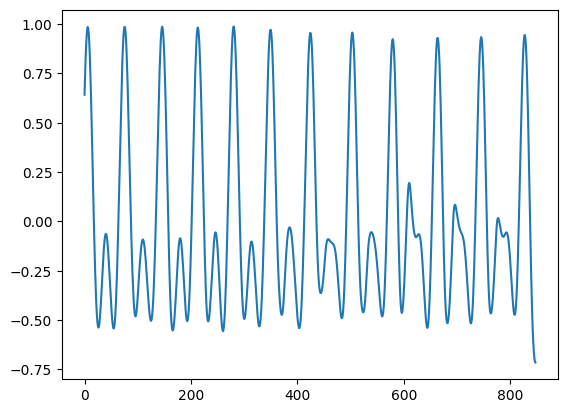

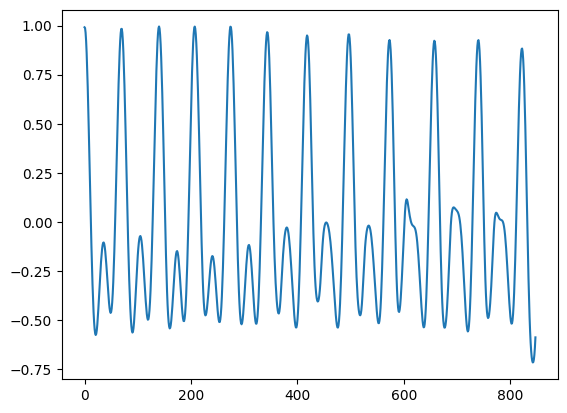

[6, 75, 146, 213, 280, 350, 424, 503, 579, 663]
[75, 146, 213, 280, 350, 424, 503, 579, 663, 745]
____
None
____
multiple of 500


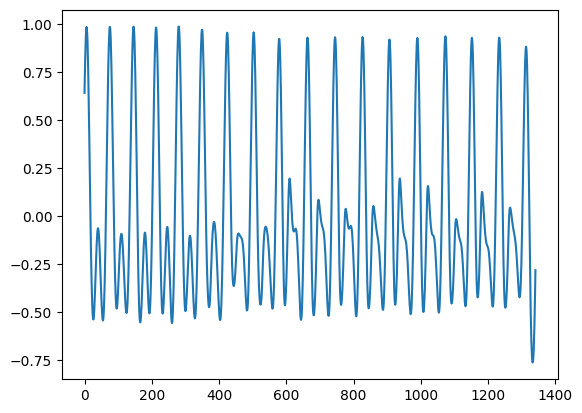

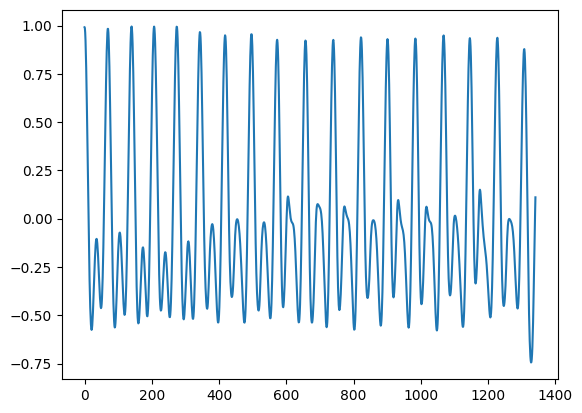

[6, 75, 146, 213, 280, 350, 424, 503, 579, 663]
[75, 146, 213, 280, 350, 424, 503, 579, 663, 745]
[146, 213, 280, 350, 424, 503, 579, 663, 745, 827]
[213, 280, 350, 424, 503, 579, 663, 745, 827, 907]
[280, 350, 424, 503, 579, 663, 745, 827, 907, 990]
[350, 424, 503, 579, 663, 745, 827, 907, 990, 1073]
[424, 503, 579, 663, 745, 827, 907, 990, 1073, 1152]
[70, 140, 207, 274, 343, 418, 496, 573, 657, 740]
[140, 207, 274, 343, 418, 496, 573, 657, 740, 822]
[207, 274, 343, 418, 496, 573, 657, 740, 822, 901]
[274, 343, 418, 496, 573, 657, 740, 822, 901, 984]
[343, 418, 496, 573, 657, 740, 822, 901, 984, 1068]
[418, 496, 573, 657, 740, 822, 901, 984, 1068, 1146]
[4658, 5415]
____
[4658, 5415]
____


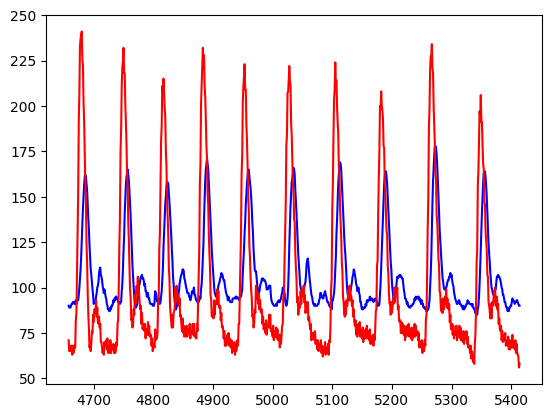

Found a match!
Checking for another graph after identifying one!


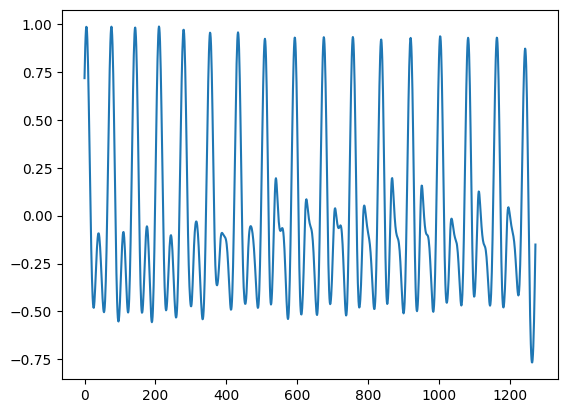

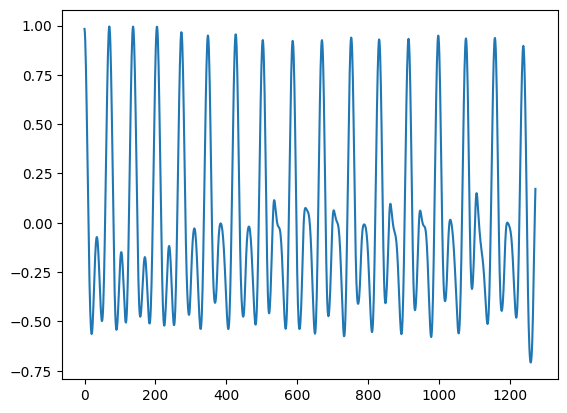

[5, 76, 143, 210, 280, 354, 433, 509, 593, 675]
[76, 143, 210, 280, 354, 433, 509, 593, 675, 757]
[143, 210, 280, 354, 433, 509, 593, 675, 757, 837]
[210, 280, 354, 433, 509, 593, 675, 757, 837, 920]
[280, 354, 433, 509, 593, 675, 757, 837, 920, 1003]
[354, 433, 509, 593, 675, 757, 837, 920, 1003, 1082]
[70, 137, 204, 273, 348, 426, 503, 587, 670, 752]
[137, 204, 273, 348, 426, 503, 587, 670, 752, 831]
[204, 273, 348, 426, 503, 587, 670, 752, 831, 914]
[273, 348, 426, 503, 587, 670, 752, 831, 914, 998]
[348, 426, 503, 587, 670, 752, 831, 914, 998, 1076]
[4728, 5495]
____
[4728, 5495]
____


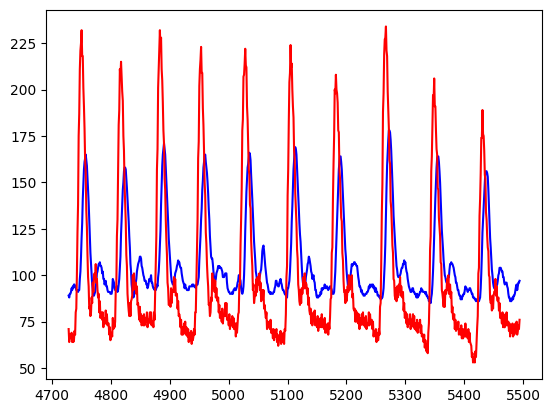

Found a match!
Checking for another graph after identifying one!


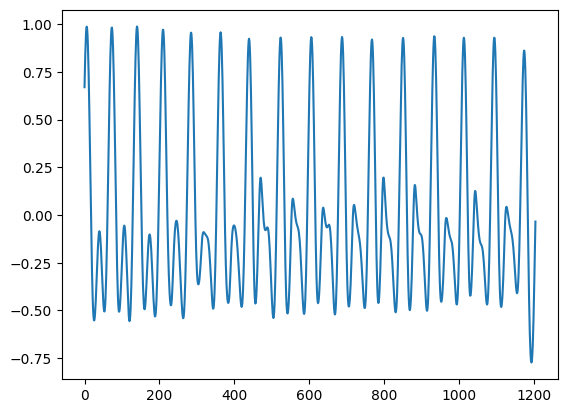

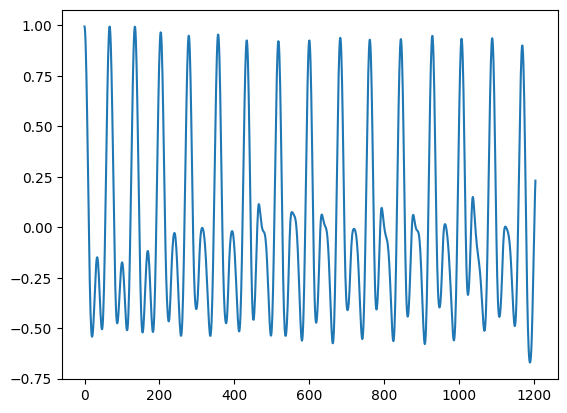

[6, 73, 140, 210, 284, 363, 439, 523, 605, 687]
[73, 140, 210, 284, 363, 439, 523, 605, 687, 767]
[140, 210, 284, 363, 439, 523, 605, 687, 767, 850]
[210, 284, 363, 439, 523, 605, 687, 767, 850, 933]
[284, 363, 439, 523, 605, 687, 767, 850, 933, 1012]
[67, 134, 203, 278, 356, 433, 517, 600, 682, 761]
[134, 203, 278, 356, 433, 517, 600, 682, 761, 844]
[203, 278, 356, 433, 517, 600, 682, 761, 844, 928]
[278, 356, 433, 517, 600, 682, 761, 844, 928, 1006]
[356, 433, 517, 600, 682, 761, 844, 928, 1006, 1088]
[4795, 5578]
____
[4795, 5578]
____


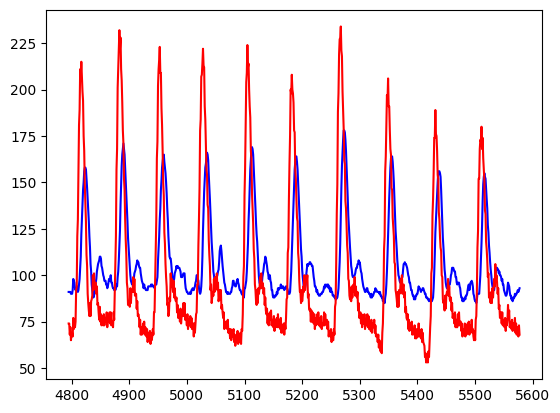

Found a match!
Checking for another graph after identifying one!


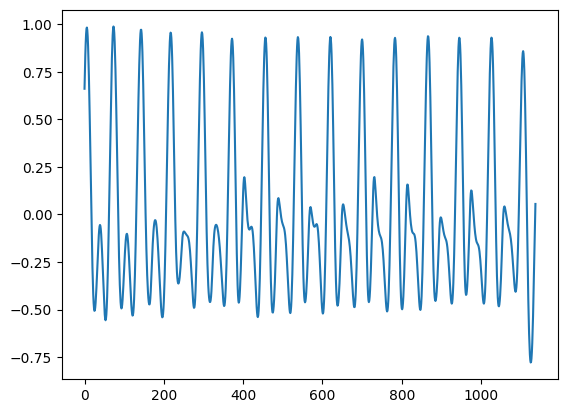

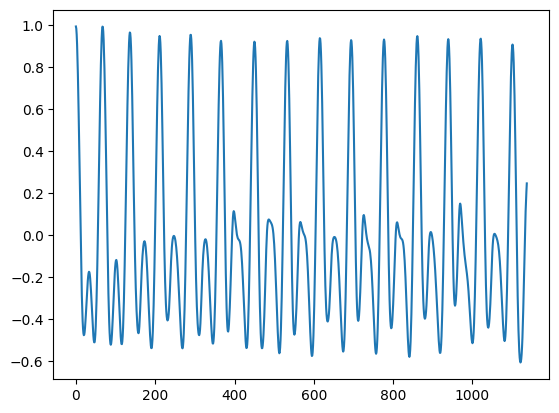

[6, 73, 143, 217, 296, 372, 456, 538, 620, 700]
[73, 143, 217, 296, 372, 456, 538, 620, 700, 783]
[143, 217, 296, 372, 456, 538, 620, 700, 783, 866]
[217, 296, 372, 456, 538, 620, 700, 783, 866, 945]
[67, 136, 211, 289, 366, 450, 533, 615, 694, 777]
[136, 211, 289, 366, 450, 533, 615, 694, 777, 861]
[211, 289, 366, 450, 533, 615, 694, 777, 861, 939]
[289, 366, 450, 533, 615, 694, 777, 861, 939, 1021]
[4862, 5661]
____
[4862, 5661]
____


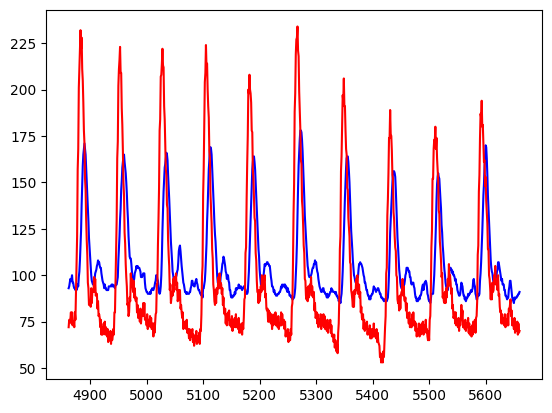

Found a match!
Checking for another graph after identifying one!


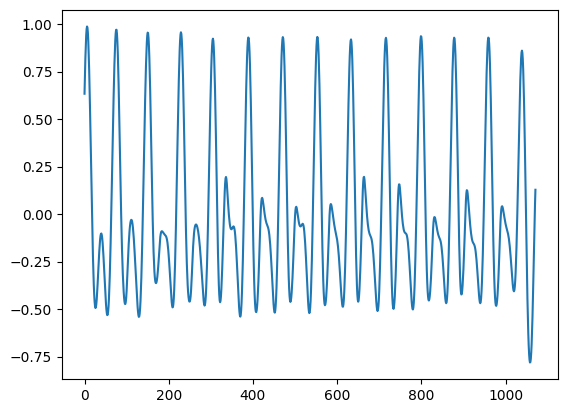

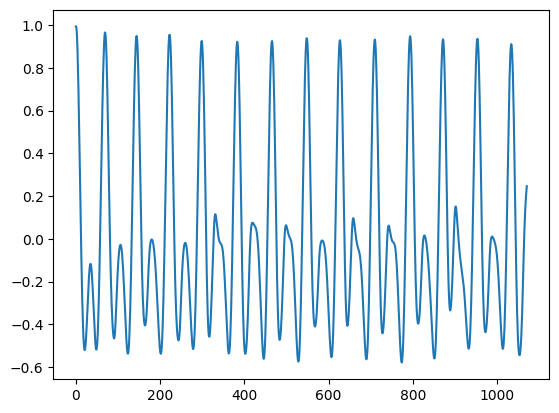

[6, 76, 150, 229, 305, 389, 471, 553, 633, 716]
[76, 150, 229, 305, 389, 471, 553, 633, 716, 799]
[150, 229, 305, 389, 471, 553, 633, 716, 799, 878]
[69, 144, 222, 299, 383, 466, 548, 627, 710, 794]
[144, 222, 299, 383, 466, 548, 627, 710, 794, 872]
[222, 299, 383, 466, 548, 627, 710, 794, 872, 954]
[4931, 5740]
____
[4931, 5740]
____


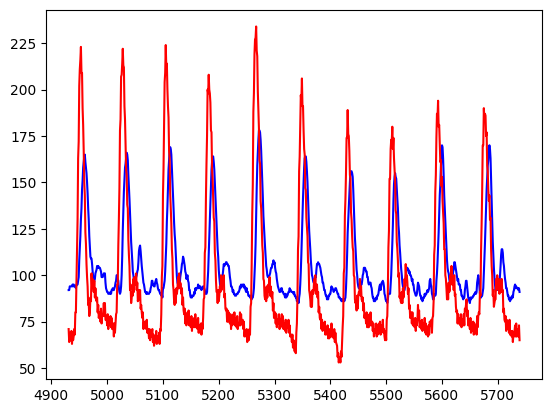

Found a match!
Checking for another graph after identifying one!


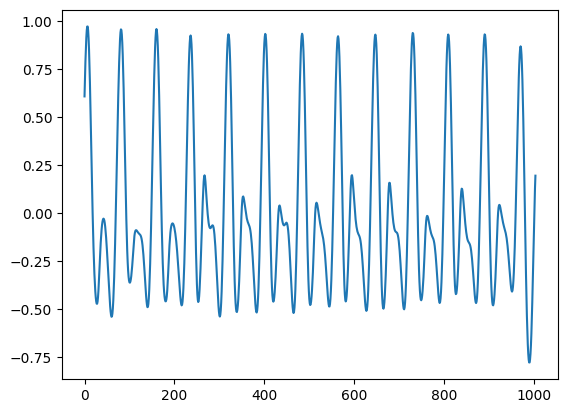

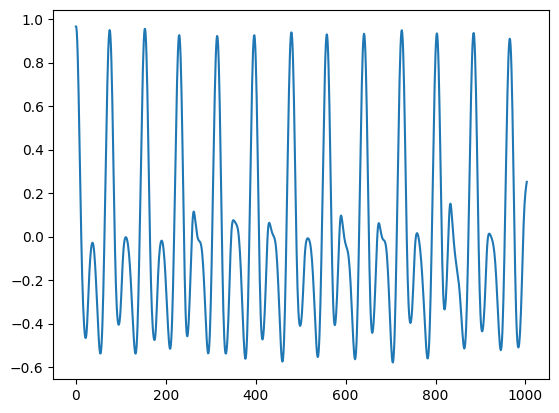

[7, 81, 160, 236, 320, 402, 484, 564, 647, 730]
[81, 160, 236, 320, 402, 484, 564, 647, 730, 809]
[75, 153, 230, 314, 397, 479, 558, 641, 725, 803]
[153, 230, 314, 397, 479, 558, 641, 725, 803, 885]
[5006, 5821]
____
[5006, 5821]
____


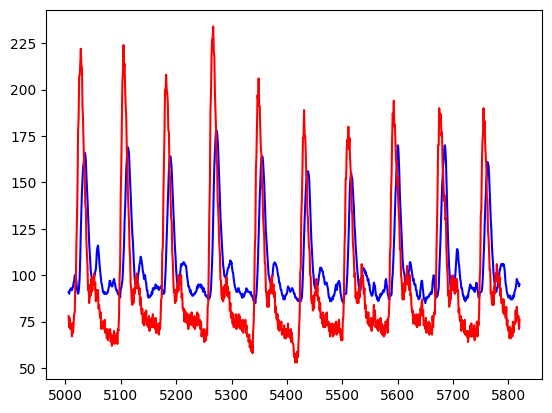

Found a match!
Checking for another graph after identifying one!


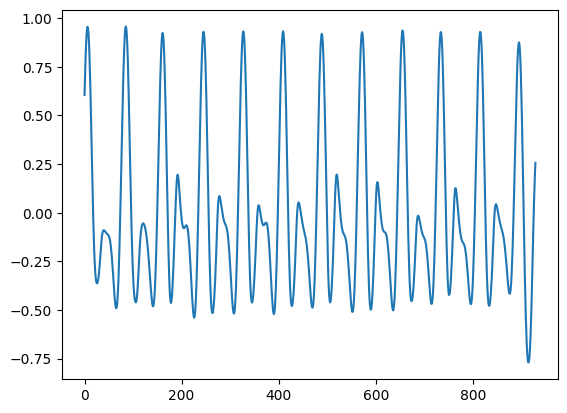

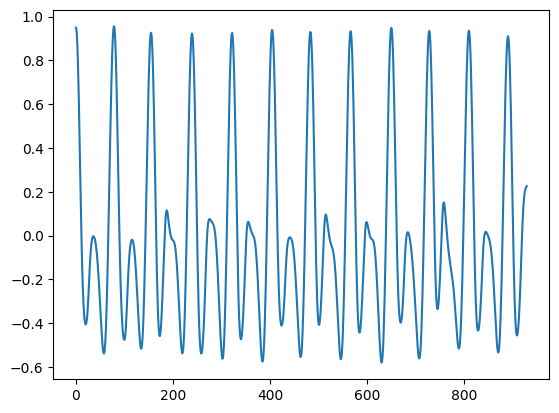

[6, 85, 161, 245, 327, 409, 489, 572, 655, 734]
[78, 155, 239, 322, 404, 483, 566, 650, 728, 810]
____
None
____
multiple of 500


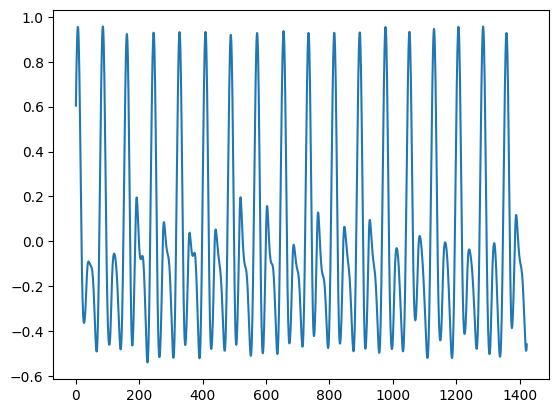

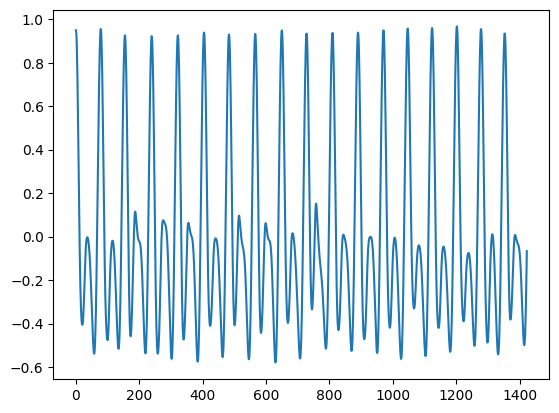

[6, 85, 161, 245, 327, 409, 489, 572, 655, 734]
[85, 161, 245, 327, 409, 489, 572, 655, 734, 815]
[161, 245, 327, 409, 489, 572, 655, 734, 815, 896]
[245, 327, 409, 489, 572, 655, 734, 815, 896, 977]
[327, 409, 489, 572, 655, 734, 815, 896, 977, 1053]
[409, 489, 572, 655, 734, 815, 896, 977, 1053, 1130]
[489, 572, 655, 734, 815, 896, 977, 1053, 1130, 1207]
[572, 655, 734, 815, 896, 977, 1053, 1130, 1207, 1285]
[78, 155, 239, 322, 404, 483, 566, 650, 728, 810]
[155, 239, 322, 404, 483, 566, 650, 728, 810, 890]
[239, 322, 404, 483, 566, 650, 728, 810, 890, 971]
[322, 404, 483, 566, 650, 728, 810, 890, 971, 1047]
[404, 483, 566, 650, 728, 810, 890, 971, 1047, 1124]
[483, 566, 650, 728, 810, 890, 971, 1047, 1124, 1202]
[566, 650, 728, 810, 890, 971, 1047, 1124, 1202, 1279]
[5084, 5902]
____
[5084, 5902]
____


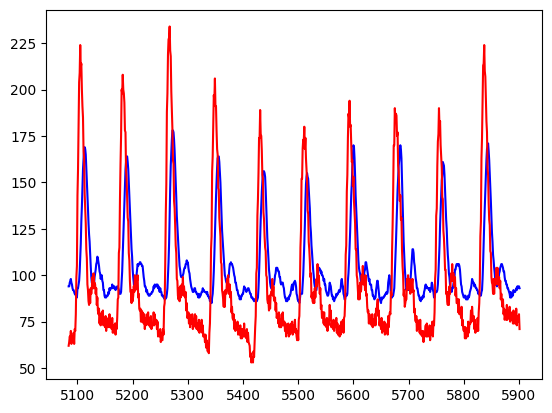

Found a match!
Checking for another graph after identifying one!


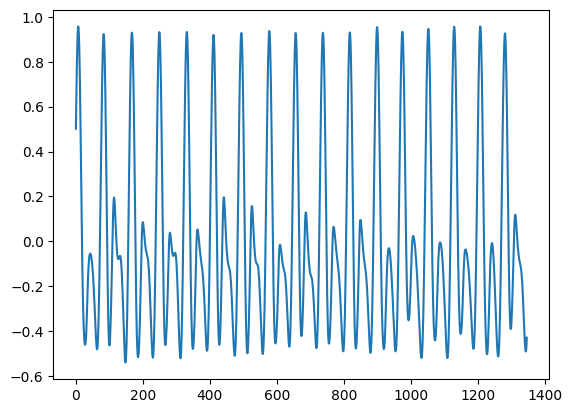

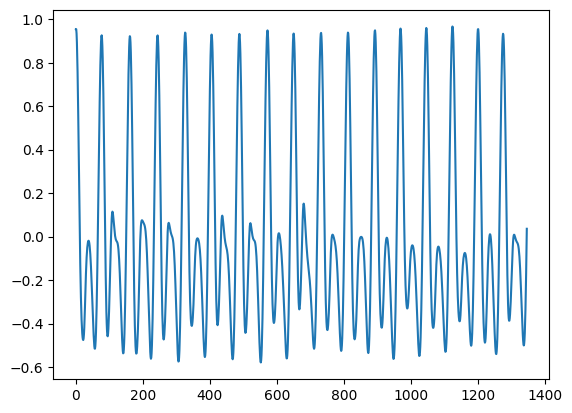

[7, 83, 167, 249, 331, 411, 494, 577, 656, 737]
[83, 167, 249, 331, 411, 494, 577, 656, 737, 818]
[167, 249, 331, 411, 494, 577, 656, 737, 818, 899]
[249, 331, 411, 494, 577, 656, 737, 818, 899, 975]
[331, 411, 494, 577, 656, 737, 818, 899, 975, 1052]
[411, 494, 577, 656, 737, 818, 899, 975, 1052, 1129]
[494, 577, 656, 737, 818, 899, 975, 1052, 1129, 1207]
[77, 161, 244, 326, 405, 488, 572, 650, 732, 812]
[161, 244, 326, 405, 488, 572, 650, 732, 812, 893]
[244, 326, 405, 488, 572, 650, 732, 812, 893, 969]
[326, 405, 488, 572, 650, 732, 812, 893, 969, 1046]
[405, 488, 572, 650, 732, 812, 893, 969, 1046, 1124]
[488, 572, 650, 732, 812, 893, 969, 1046, 1124, 1201]
[5161, 5983]
____
[5161, 5983]
____


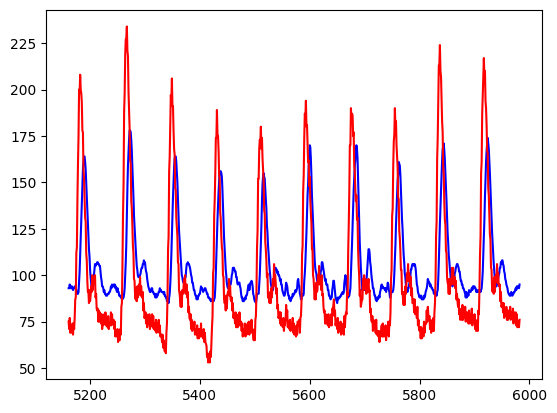

Found a match!
Checking for another graph after identifying one!


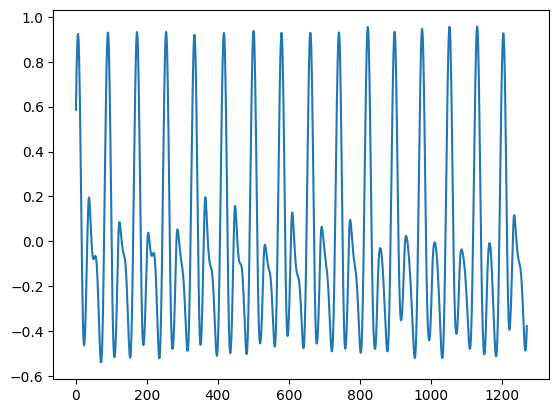

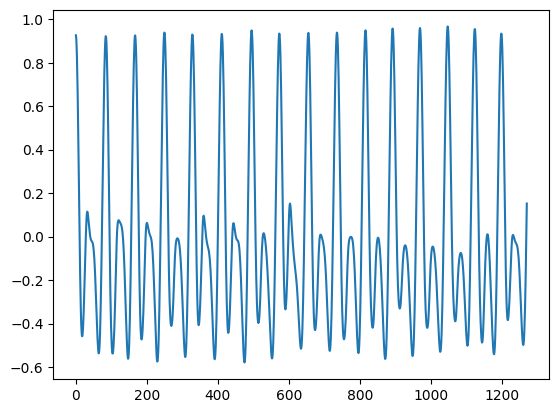

[6, 90, 172, 254, 334, 417, 500, 579, 660, 741]
[90, 172, 254, 334, 417, 500, 579, 660, 741, 822]
[172, 254, 334, 417, 500, 579, 660, 741, 822, 898]
[254, 334, 417, 500, 579, 660, 741, 822, 898, 975]
[334, 417, 500, 579, 660, 741, 822, 898, 975, 1052]
[417, 500, 579, 660, 741, 822, 898, 975, 1052, 1130]
[84, 167, 249, 328, 411, 495, 573, 655, 735, 816]
[167, 249, 328, 411, 495, 573, 655, 735, 816, 892]
[249, 328, 411, 495, 573, 655, 735, 816, 892, 969]
[328, 411, 495, 573, 655, 735, 816, 892, 969, 1047]
[411, 495, 573, 655, 735, 816, 892, 969, 1047, 1124]
[5245, 6059]
____
[5245, 6059]
____


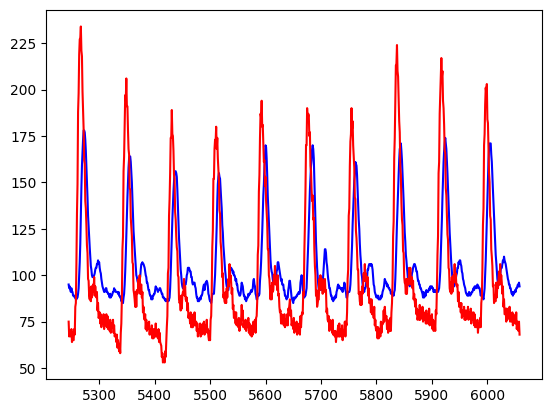

Found a match!
Checking for another graph after identifying one!


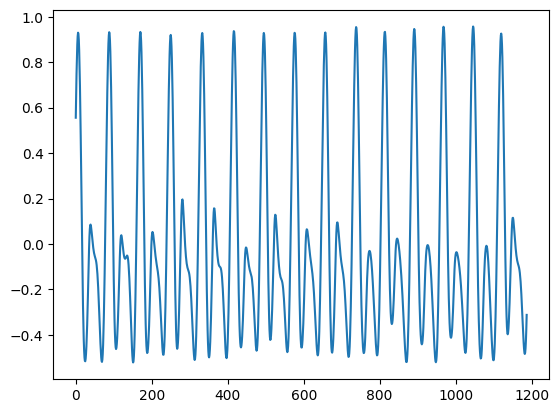

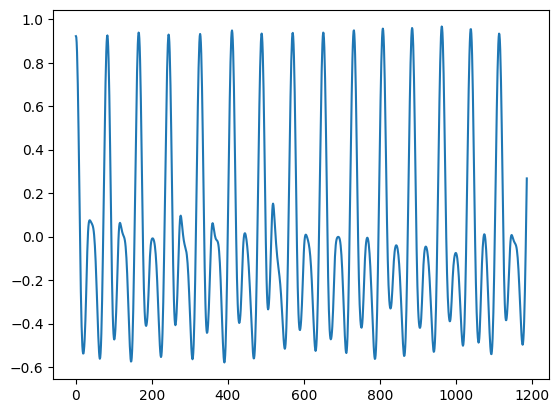

[6, 88, 170, 250, 333, 416, 495, 576, 657, 738]
[88, 170, 250, 333, 416, 495, 576, 657, 738, 814]
[170, 250, 333, 416, 495, 576, 657, 738, 814, 891]
[250, 333, 416, 495, 576, 657, 738, 814, 891, 968]
[333, 416, 495, 576, 657, 738, 814, 891, 968, 1046]
[83, 165, 244, 327, 411, 489, 571, 651, 732, 808]
[165, 244, 327, 411, 489, 571, 651, 732, 808, 885]
[244, 327, 411, 489, 571, 651, 732, 808, 885, 963]
[327, 411, 489, 571, 651, 732, 808, 885, 963, 1040]
[5328, 6136]
____
[5328, 6136]
____


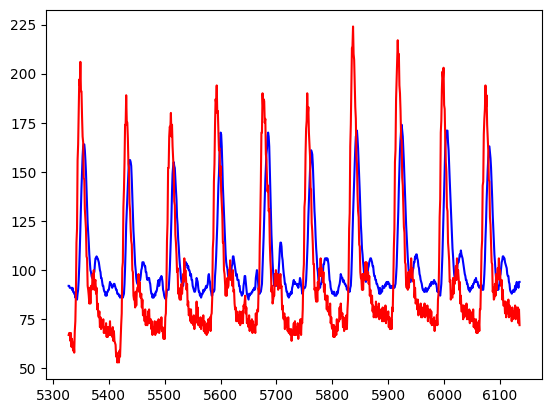

Found a match!
Checking for another graph after identifying one!


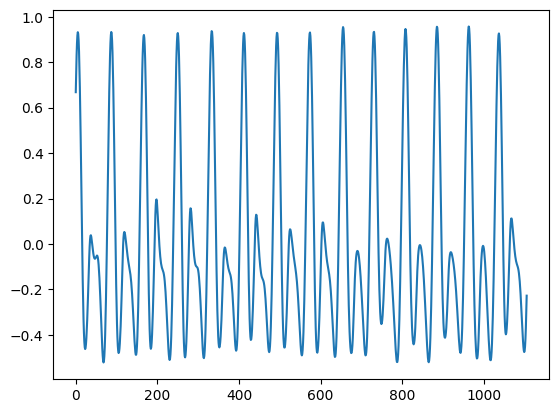

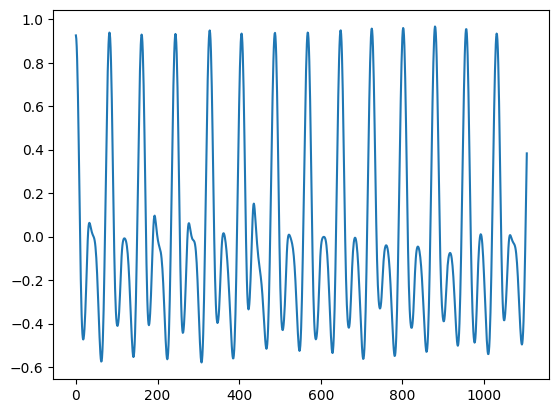

[5, 87, 167, 250, 333, 412, 493, 574, 655, 731]
[87, 167, 250, 333, 412, 493, 574, 655, 731, 808]
[167, 250, 333, 412, 493, 574, 655, 731, 808, 885]
[250, 333, 412, 493, 574, 655, 731, 808, 885, 963]
[82, 161, 244, 328, 406, 488, 568, 649, 725, 802]
[161, 244, 328, 406, 488, 568, 649, 725, 802, 880]
[244, 328, 406, 488, 568, 649, 725, 802, 880, 957]
[5410, 6213]
____
[5410, 6213]
____


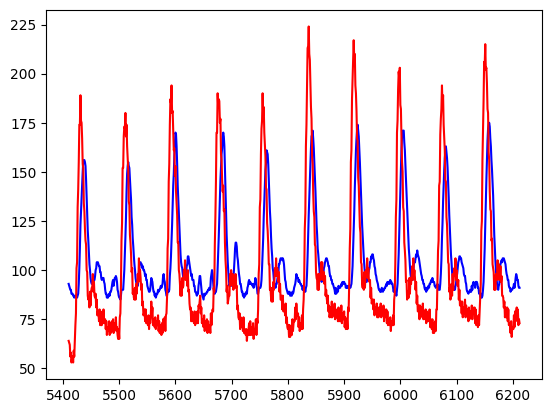

Found a match!
Checking for another graph after identifying one!


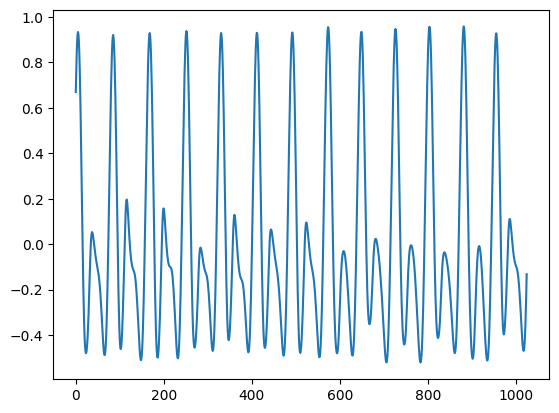

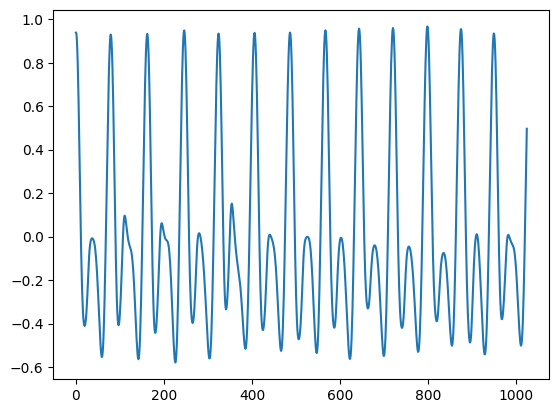

[5, 85, 168, 251, 330, 411, 492, 573, 649, 726]
[85, 168, 251, 330, 411, 492, 573, 649, 726, 803]
[168, 251, 330, 411, 492, 573, 649, 726, 803, 881]
[79, 162, 246, 324, 406, 486, 567, 643, 720, 798]
[162, 246, 324, 406, 486, 567, 643, 720, 798, 875]
[5489, 6291]
____
[5489, 6291]
____


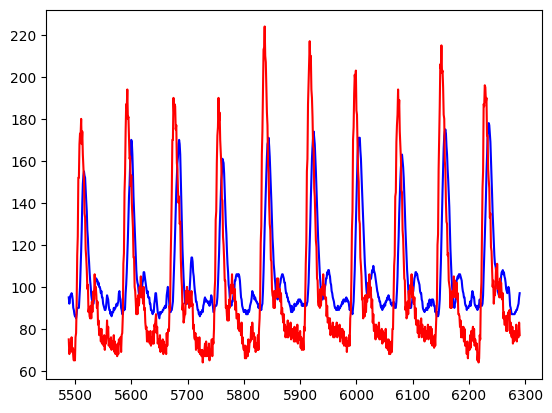

Found a match!
Checking for another graph after identifying one!


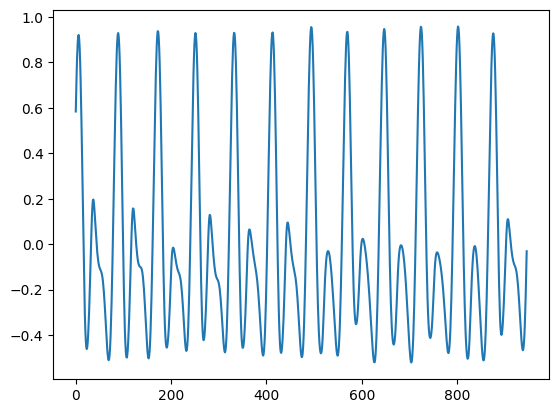

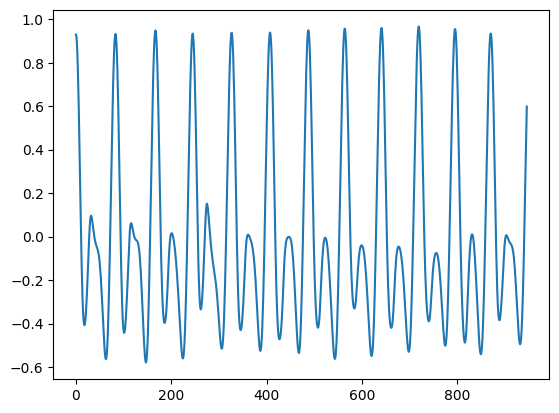

[6, 89, 172, 251, 332, 413, 494, 570, 647, 724]
[89, 172, 251, 332, 413, 494, 570, 647, 724, 802]
[83, 167, 245, 327, 407, 488, 564, 641, 719, 796]
[5572, 6365]
____
[5572, 6365]
____


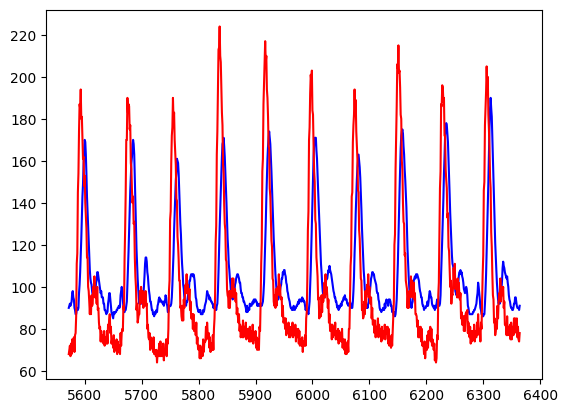

Found a match!
Checking for another graph after identifying one!


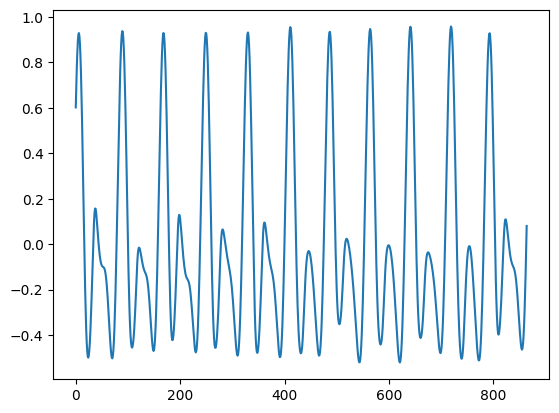

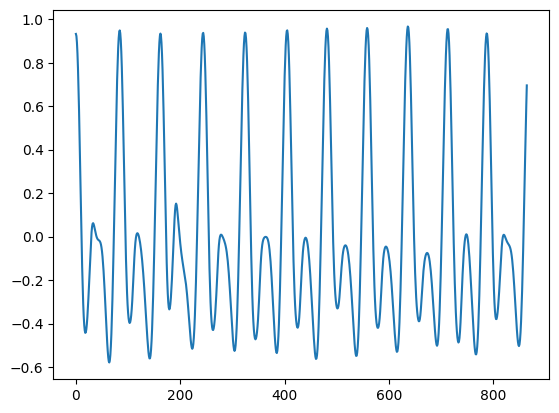

[6, 89, 168, 249, 330, 411, 487, 564, 641, 719]
____
None
____
multiple of 500


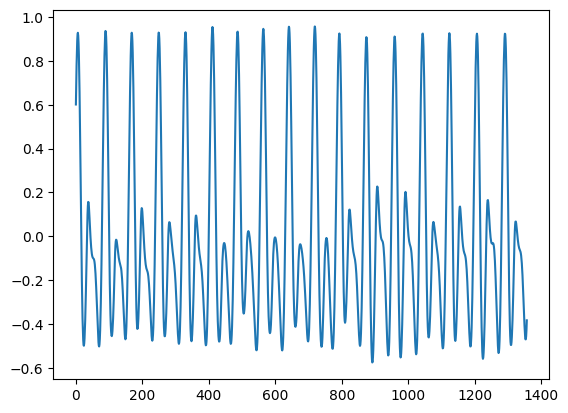

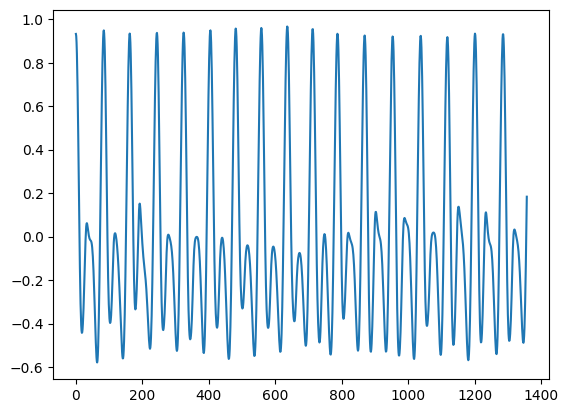

[6, 89, 168, 249, 330, 411, 487, 564, 641, 719]
[89, 168, 249, 330, 411, 487, 564, 641, 719, 793]
[168, 249, 330, 411, 487, 564, 641, 719, 793, 874]
[249, 330, 411, 487, 564, 641, 719, 793, 874, 959]
[330, 411, 487, 564, 641, 719, 793, 874, 959, 1044]
[411, 487, 564, 641, 719, 793, 874, 959, 1044, 1124]
[487, 564, 641, 719, 793, 874, 959, 1044, 1124, 1207]
[84, 162, 244, 324, 405, 481, 558, 636, 713, 787]
[162, 244, 324, 405, 481, 558, 636, 713, 787, 869]
[244, 324, 405, 481, 558, 636, 713, 787, 869, 953]
[324, 405, 481, 558, 636, 713, 787, 869, 953, 1038]
[405, 481, 558, 636, 713, 787, 869, 953, 1038, 1118]
[481, 558, 636, 713, 787, 869, 953, 1038, 1118, 1201]
[5656, 6446]
____
[5656, 6446]
____


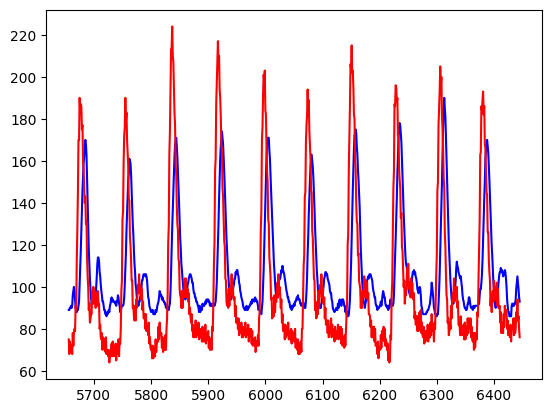

Found a match!


Process Process-23:
Process Process-24:
Traceback (most recent call last):
  File "/usr/lib/python3.11/multiprocessing/process.py", line 314, in _bootstrap
    self.run()
  File "/usr/lib/python3.11/multiprocessing/process.py", line 108, in run
    self._target(*self._args, **self._kwargs)
Traceback (most recent call last):
  File "<ipython-input-30-cbe08addbea7>", line 139, in analyze_data
    time.sleep(5)
  File "/usr/lib/python3.11/multiprocessing/process.py", line 317, in _bootstrap
    util._exit_function()
KeyboardInterrupt
  File "/usr/lib/python3.11/multiprocessing/util.py", line 363, in _exit_function
    _run_finalizers()
  File "/usr/lib/python3.11/multiprocessing/util.py", line 303, in _run_finalizers
    finalizer()
  File "/usr/lib/python3.11/multiprocessing/util.py", line 227, in __call__
    res = self._callback(*self._args, **self._kwargs)
          ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/lib/python3.11/multiprocessing/queues.py", line 199, in _finali

KeyboardInterrupt: 

In [30]:
true = [] #Mimic's the real time data you have

def record_data(queue1,queue2): #Simulating recording data, 100 hertz
    with open("/content/1100.txt","r") as file1:
      previous=0
      for line in file1.readlines():
          data = line.strip().split(',')
          true.append(data)
          queue2.put(float(data[2]))
          queue1.put(float(data[1]))

          #Can comment out for faster analysis
          # time.sleep(float(data[0])-previous)  # Simulating data recording delay


          previous=float(data[0])


def okay(ten):
  #Given a list of ten x-values for peak, if the distance between the two peaks are considered an outlier, cuz of outlier x-values, return false
  #Use findTen, which incorporates this
  a=list(ten)
  cd = np.average([a[i+1]-a[i] for i in range(9)])
  nL = [a[0]+b*cd for b in range(10)]
  print(a)
  for i in range(10):
    if abs(nL[i]-a[i])> cd + 30: #Very simple test for outliers, used to eliminate if peak indices was given as [1, 600, 680, 790]
      return False
  return True

def findTen(a):
  #Given a list of x-value for peaks, contains starting index and ending index of "okay" ten peaks
  Answer=[]
  for i in range(len(a)-10):
    Ten = a[i:i+10]
    if okay(Ten):
      Answer.append([a[i],a[i+10]])
  return Answer #This should be a list of start and ending indexes for good ten peaks [[Good1Start, Good1Stop],[Good2Start, Good2Stop]...]


def findSim(l1,l2):
  #Given the two lists for starting and ending indices from findTen, compare if the two peaks are close enough
  for i in l1:
    for a in l2:
      if np.abs(i[0]-a[0])<=20:
        return i,a
        #Returns a 2x2 matrix [[start1,end1],[start2,end2]]

def actual(y1,y2,threshold,lowerbound):
  #y1, y2 are data, threshold is what cosine simularity is required
  #Lower bound is just where in the data do you start

  fpass = [1.3, 3.8]  # Passband frequency range
  order = 2  # Filter order
  sos = signal.butter(order, fpass, fs=100, btype='band', output='sos')
  y1_inverted = signal.sosfiltfilt(sos, y1)
  y2_inverted = signal.sosfiltfilt(sos, y2)
  y1_inverted=y1_inverted[lowerbound+1:]
  y2_inverted=y2_inverted[lowerbound+1:]

  #Return a 2xn matrix
  sol = []
  for i in range(len(y1_inverted)-len(toConvolve)): #Cosine simularity
    arr = y1_inverted[i:i+len(toConvolve)]
    similarity = cosine_similarity(np.array(arr).reshape(1,-1), np.array(toConvolve).reshape(1,-1))
    sol.append(similarity[0][0])

  #Can comment out
  plt.plot(sol)
  plt.show()


  p1,_=find_peaks(sol,height = threshold,distance=50)
  sol = []
  for i in range(len(y2_inverted)-len(toConvolve)): #Cosine simularity
    arr = y2_inverted[i:i+len(toConvolve)]
    similarity = cosine_similarity(np.array(arr).reshape(1,-1), np.array(toConvolve).reshape(1,-1)) #Tests the cosine similarity of the convolution vector
    sol.append(similarity[0][0])

  #Can comment out
  plt.plot(sol)
  plt.show()


  p2,_=find_peaks(sol,height = threshold,distance=50) #If the similarity is greater than a threshold, registers as a peak.
  #p1 gives the points where the first graph matchs the convolution nugget with a .7 threshold for cosine simularity
  #p2 is the same for second graph
  try:
    ten1 = findTen(p1)
    ten2 = findTen(p2)

    matrix = findSim(ten1,ten2)
    lower = min([matrix[0][0],matrix[1][0]])
    upper = max([matrix[0][1],matrix[1][1]])

    #Can comment out
    print([lowerbound+lower,lowerbound+upper])

    #This is the interval of ten good peaks
    return [lowerbound+lower,lowerbound+upper]
  except TypeError:
    #Returns none if interval not found
    return None



l1=[] #Finger device readings
l2=[] #Toe device readings
sum=0
total=0

def analyze_data(queue1,queue2):
  checkAgain = False
  low=-1
  while True:
    data2=queue2.get()
    data1=queue1.get()
    if data2 is None or data1 is None:
      break
    l1.append(int(data1))
    l2.append(int(data2))

    #Checks every 5 seconds for ten peaks or after every correct identification (multiple peaks can occur within a 5 second interval)
    if len(l1)%500==0 or checkAgain:
      if checkAgain:
        print("Checking for another graph after identifying one!")
      checkAgain = False
      if (len(l1) % 500 == 0):
        print("multiple of 500")

      interval = actual(l1,l2,.9,low)

      #Can comment out
      print("____")
      print(interval)
      print("____")

      if interval is not None:
        plt.plot(range(interval[0],interval[1]), l1[interval[0]:interval[1]], color='blue', label='Filtered Distal')
        plt.plot(range(interval[0],interval[1]), l2[interval[0]:interval[1]], color='red', label='Filtered Proximial')
        plt.show()
        print("Found a match!")

        #Can comment out
        time.sleep(5)

        low = interval[0]
        checkAgain = True




if __name__ == "__main__":  # confirms that the code is under main function
  with Manager() as manager:
    true = manager.list()
    processes=[]
    data_queue1 = multiprocessing.Queue()
    data_queue2 = multiprocessing.Queue()

    #Simulating reading data
    get_data = Process(target=record_data,args=(data_queue1,data_queue2,))
    processes.append(get_data)
    time.sleep(1)

    #Batch real-time analysis
    analyze = Process(target=analyze_data,args=(data_queue1,data_queue2,))
    processes.append(analyze)
    get_data.start()
    analyze.start()


    for p in processes:
        p.join()